# Validation of updated AIC criterion for model selection and Application of Parametric models on Survival Analysis: a study on Telco Customer Churn

Guillem Sitges i Puy


November 30th, 2018


Statistical modelling and inference
Prof. Omiros Papaspiliopoulos


## Theory

### Introduction

Survival analysis is the study of time to occurrence of an specific event and it can be applied to many different fields (e.g. get a job after graduation, death after surgery).
The typical data for survival analysis has some specific features:
   - Survival time: variable to be predicted, always non-negative
   - Censoring: appears in case that the exact time of the occurrence of the event is not observed for some subjects.
   
Three main functions describe the behaviour of this data: Survival function S(t), hazard function h(t) and cumulative hazard or probability density function Λ(t) and they will be further discussed below.
This study uses basic concepts on parametric modelling of survival functions applied to a customer churn dataset. 

### Define Parametric models

Parametric models are a family of models that assumes a certain distribution of the hazard function prior to the estimation of the model, as opposed to non-parametric models that do not specify λ(t). Semi - parametric models do assume an specific form for the covariates but  not for the hazard function.
The type of distribution chosen will affect the hazard rate, that is how the probability of failure evolve over time: at a constant rate , failure probability increases as time goes by,... Further explanation on the characteristics of the distributions is given later in this study. The coefficients are fitted by full maximum likelihood, compared to semi-parametric models where a partial log-likelihood is used because the baseline hazard is unspecified and non-parametric models where no coefficient is estimated.
The likelihood function takes the form of:


$$ Likelihood =  \prod_{i=1}^n  \lambda(t_{i}) ^{d_{i}}S(t_{i}) $$

Where S(ti) is the survival probability for individual “i” at time “t”, λ(ti)  is the hazard function for individual “i” at time “t” and di is the censoring variable, taking value 1 if the event is observed for individual i, and 0 otherwise.
This formulation relies on the assumption that censoring is non-informative. Hence, the only fact we know from a censored observation is that the survival time exceed the interval time of observation. 
If the subject died/failed at time ti, its contribution to the likelihood function is: $$ L_{i} = \lambda(t_{i})S(t_{i})$$ while, for a right censoring (the most typical), we only now that the survival time T exceed ti: $$ L_{i} = S(t_{i})$$

### Proportional hazards and Accelerated failure time assumptions


In the family of parametric models, we can distinguish into two main assumptions: Proportional hazards and Accelerated failure time. The assumption refers to how the covariates affect the hazard function. Here is important to note the introduction of the baseline hazard function λ0(t). It is defined as the value of the hazard function when all covariates are equal to zero. Commonly, covariates are standardized to be mean equal zero.

**Proportional hazards**: the hazard function takes the form of $$ \lambda(t|\textbf{x}, \beta ) =  \lambda _{0}(t) exp( \phi (\textbf{x}^T  \beta )) $$ and it implies that the effect of the covariates is to increase or decrease the hazard by a constant factor.

**Accelerated failure time**: the hazard function takes the form of $$ \lambda(t|\textbf{x}, \beta ) =  \theta \lambda _{0}(\theta t) $$ where $$ \theta = exp( \phi (\textbf{x}^T  \beta )) $$ and it implies that the effect of the covariates is to accelerate or decelerate the speed at which the subject moves along the hazard function or, equivalently, it accelerate/decelerate the time to failure.

The difference between the two assumptions can be easily shown in the following picture:
![title](Comparison_AFT_PH.png)
Figure 1: Comparison between Accelerated Failure Time and Proportional Hazards assumptions. Breheny, Patrick (2015). Accelerated Failure Time Models. *Survival Data Analysis (BIOS 7210)*

Grey colored line (referred as Baseline) represents the hazard when all covariates are equal to zero, that is the baseline hazard λ0. The red line is the effects of covariates on baseline hazard through Proportional hazard assumption. The effect is a downward shift (it could be upward) indicating that, at each time, the probability of failure is lower. Alternatively, under Accelerated Failure time assumption, the shift of the baseline hazard can be rightward or leftward. In this example, the curve shifts to the right, showing that the covariates decelerate the time to failure. Notice that, the individual on blue line experience, at approximately period 0, the hazard individual on grey line experience at approximately period -0.5 (earlier).

Under Proportional Hazards assumption, the following derivation can be performed: $$ log(S(t)) = \int_0^t \lambda_{0}(t)\;exp(\phi(\textbf{x})^T \beta) dt = \big\{\int_0^t \lambda_{0}(t) dt\big\}\;exp(\phi(\textbf{x})^T \beta) =\; \Lambda_{0}(t)\;exp(\phi(\textbf{x})^T \beta) $$ Taking the negative and the log of the above expression: $$ log(-log(S(t))) = log(-\Lambda_{0}(t)\;exp(\phi(\textbf{x})^T \beta)) =log(-\Lambda_{0}) + \phi(\textbf{x})^T \beta  $$

Where covariates are a constant of the function. Hence, under PH assumptions, we would expect parallel shifts (up/down) of the log negative cumulative hazard curve by the effect of a change in one of the covariates. This equality will be used later in the analysis to check graphically the fit of our data under the PH assumption.

**From Proportional Hazards to Accelerated failure time estimator**

As discussed by Ingrid Van Keilegom(2015). Survival Analysis, the two assumptions are mathematically equivalent and it exists a link in between the two assumptions. Consequently, the estimation and assessment of best distribution and variable selection can be performed regardless what assumption is accepted. However, the interpretation of the coefficieents will be different under each assumption.

Let's take for example that we estimate β=¾ for the variable gender (being woman equal to 1, 0 otherwise).
Under **Proportional hazards**, we define the hazard ratio as $$ r(t|x_{1}, x_{0}) = \frac{\lambda(t|x_{1})}{\lambda(t|x_{0})} $$ Hence, the hazard ratio is equal to exp(0.75). 
The interpretation is as follows: at any given time, the probability of failure is exp(0.75)≈2.117 large for women than for man (ratio is constant over time).

Under the **Accelerated failure time assumption**, the covariates affect multiplicatively on time rather than on the hazard function. Following the notation given above, θ1=exp(0.75*1)≈2.117 and θ0=exp(0.75*0)=1. 
The interpretation is as follows : the expected time of failure for a woman is exp(0.75) faster than a man. Equivalently, the probability of a woman surviving 1 year (given that year is the measure of time) is equal to the probability of man surviving 2.117 years, ceteris paribus.






### Base hazard distributions

#### Exponential

Hazard function is constant over time. Survival function and hazard function are described as: $$ S(t) = exp(-\lambda t)$$ and $$ \lambda_{0}(t)= \lambda$$

#### Weibull

Weibull distribution includes exponential distribution. T follows a Weibull distribution T~W(λ,p) and, Tp~Exp(λ). Thus, for value p = 1, Weibull distribution is exactly the exponential distribution. Survival function and hazard function are described as: $$ S(t) = exp(-\lambda t^p)$$ and $$ \lambda(t)= \lambda p t^{p-1}$$

The log of the hazard function is linear on time: $$ log(\lambda(t)) = log(\lambda p t^{p-1}) = plog(\lambda) + log(p) + (p-1)log(t) $$ For p=1, the log of the hazard function is constant (just as in the exponential case); for p>1, the function increases over time; and, for p<1, the function decreases over time.

#### Log-logistic

Log-logistic distribution gives more flexibility on the shape of the hazard function. It can be increasing, decreasing or both.
Survival function and hazard function are described as: $$ S(t) = \frac{1}{1 + \lambda t^{\theta}} $$ and $$ \lambda(t) = \frac {\lambda \theta t^{\theta-1}}{1 + \lambda t^{\theta}}$$

For values θ>1, the hazard function increases to a maximum and then decreases while for θ≤1, the hazard function decreases monotonically.
In some papers, log-logistic function is defined with the parameter λ=exp(a).

#### Gompertz

Gompertz distribution is taken under the form of Proportional Hazards assumption. Survival function and hazard function are described as: $$ S(t) = exp(-\frac {\lambda}{\theta}(exp(\theta t)-1)) $$ and $$ \lambda(t) = \lambda exp(\theta t)$$

For θ=0, the hazard function is exactly the hazard function for exponential distribution. 



### AIC Criterion for Survival Analysis

One of the main purpose of using parametric models is to make inferences on the effect of covariates on probability to failure. Thus, model and variable selection becomes crucial. A basic, well-known criterion is Akaike Information Criterion (AIC), used in many different kinds of modelling.
Liang and Zoe, 2009 proposed a modification of AIC criterion to fit better on survival analysis. It derives from the AIC criterion derived by Collet,1994, who proposed the following formula: $$ AIC = -2log(Likelihood) + 2(p+2+k) $$ where  p refers to the number of covariates user and k takes different values depending on the distribution assumed: k=0 for exponential, k=1 for Weibull and k=2 for the rest.

The extension proposed by Liang and Zoe,2009 is the following: $$ AIC_{SUR} = AIC + \frac {2(p+2)(p+3)}{n-p-3}$$ where n is the total number of observations (or the toTal number of uncensored observations).
By multiple simulations, using different sample sizes and distributions, Liang and Zoe demonstrate that the proposed modification performs better than AIC and BIC criterion in a variety of situations.



### Kaplan - Meier estimator

Kaplan - Meier estimator belong to the family of non-parametric estimators of the survival function.It is estimated using the following formula: $$ Ŝ(t) =  \prod_{t_{i}<t} \frac{n_{i}-d_{i}}{n_{i}}  $$ where n refers to people at risk (susceptible to fail) to and d refers to people who fail at that time.
In our study is used as an alternative approach to the empirical survival function and to assess the goodness of fit of different distributions. 

### Collet Variable selection strategy

Collet describe an specific design an heuristic optimization approach using both forward and backward selection methods. The algorithm consists on the following steps:

 - First step: Fit a univariate model for each covariate, and identify the predictors significant at some level p1.
 - Second step: With all significant variables from step 1, use backward selection process
 - Third step: Taking the model from step 2, consider all non-significant variables from step 1 in forward selection process.
 - Final step: Do final pruning of main-effects model, add interactions if considered necessary.

## Methodology

The project is devided in four main section:
    
**Section 1: assess goodness of fit of the distributions**

In this section we use both graphical and statistical methods. For the statistical methods we define the loglikelihood according to the thoery explained above. Each distribution has a differetn form of the log-likelihood. Parameters are maximized using Generic Likelihood Model package from StatsModel. The method for optimization used is Newton-conjugate gradient which was selected by trial and error, among all the methods available in the package, because it performs the best interms of convergence and computational time.

NOTE: Newton-conjugate gradient does a quadratic approximation at each point to find direction of optimization. The inverse of the Hessian is evaluted using the conjugate-gradient method. The maximum number of iterations is set at 100 or 10000 depending on the complexity of the optimization to solve.

**Section 2: Proportional Hazards assumption**

In this section we use graphical methods to study the property of Proportional Hazards of the data. We exploid the idea that under certain trasnformations of the survival function, the effect of the covariates on it should be parallel shifts.
    
**Section 3: Variable selection**

In this section we analyse the problem of Hessian non-invertable. We make use of the package 'Lifelines' to make sure the problem is not related to the construction of the log-likelihoods we defined. We use Generic Likelihood Model package from StatsModel for optimization.
    
**Section 4: Simulation**

In this section we simulate different models using Generic Likelihood Model package from StatsModel for optimization. We exploid the idea that AIC improved criterion reveals better solutions for small samples.
    



## Code

### Set -up 

In [1]:
#Import all necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff
import seaborn as sns
from lifelines import ExponentialFitter
import statsmodels.api as st
from sklearn import preprocessing
from numpy import linalg as LA

### Loading data 

In [3]:
#Loading Telco Customer Data
data = pd.read_csv("Telco-Customer-Churn.csv")

We first explore the structure of the dataset and rearrange anything if necessary.

In [4]:
#Check the categorical variable values
print('Categorical variable values:')
for column in list(data.columns.values):
    print(column,np.unique(data[column]))

Categorical variable values:
customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
tenure [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService ['No' 'Yes']
MultipleLines ['No' 'No phone service' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'No internet service' 'Yes']
OnlineBackup ['No' 'No internet service' 'Yes']
DeviceProtection ['No' 'No internet service' 'Yes']
TechSupport ['No' 'No internet service' 'Yes']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Bank transfer (automatic)' 'Credit card (automat

In [5]:
#Looks that everything is correctly encoded. However, customerID values are tedious

In [6]:
data['customerID'] = data.index

In [7]:
### Create dummy variables for categorical data 
categorical_list = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','gender','Partner','Dependents','PhoneService','PaperlessBilling']
#We take all the new columns except 1, which will be included in the intercept
new_name = 'Dum'

for variable in categorical_list:
    
    globals()[variable]  = pd.get_dummies(data[variable])
    globals()[variable].columns = [s + str(new_name) + str(variable) for s in list(globals()[variable].columns.values)]
    globals()[variable] = globals()[variable].iloc[:,:-1]
    
#Append to original dataset
for variable in categorical_list:
    for var in globals()[variable]:
        data[var] = globals()[variable][var]
        
        
#Create the intercept for regression
data['Intercept'] = 1
    

In [8]:
#extract time to event as array
time_to_event = data.iloc[:,5].values

In [9]:
#Defining variable for censored data (dummy 0/1)

censored = pd.get_dummies(data['Churn'])
censored = censored.iloc[:,1]

In [10]:
#We decide to take the mean of all values in column Total Charges for missing data
from pandas.api.types import is_string_dtype
is_string_dtype(data['TotalCharges'])
data['TotalCharges']= data['TotalCharges'].apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

In [11]:
#Columns and new names after arrangement
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'NoDumMultipleLines',
       'No phone serviceDumMultipleLines', 'DSLDumInternetService',
       'Fiber opticDumInternetService', 'NoDumOnlineSecurity',
       'No internet serviceDumOnlineSecurity', 'NoDumOnlineBackup',
       'No internet serviceDumOnlineBackup', 'NoDumDeviceProtection',
       'No internet serviceDumDeviceProtection', 'NoDumTechSupport',
       'No internet serviceDumTechSupport', 'NoDumStreamingTV',
       'No internet serviceDumStreamingTV', 'NoDumStreamingMovies',
       'No internet serviceDumStreamingMovies',
       'Bank transfer (automatic)DumPaymentMethod',
       'Credit card (automatic)DumPaymentMe

### Descriptive analysis

#### High level descriptive statistics

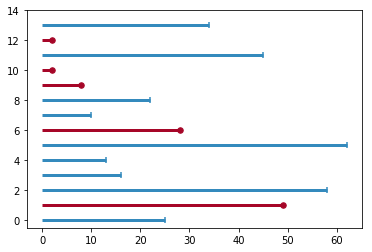

UsageError: Line magic function `%%hide` not found.


In [12]:
from lifelines.plotting import plot_lifetimes
data15 = data.iloc[1:15]
censored = pd.get_dummies(data15['Churn'])
censored = np.array(censored.iloc[:,1])
observed = np.array(data15['tenure'])
plot_lifetimes(observed,event_observed=censored)
%%hide output

In [13]:
churn_rate = data.groupby(['Churn']).agg({ 'customerID':'count'})/len(data.customerID)
churn_rate


,customerID
Churn,
No,0.73463
Yes,0.26537


In [14]:
grouped_data = data.groupby('Churn')
grouped_data.describe().unstack()


                                                  Churn
Bank transfer (automatic)DumPaymentMethod  count  No       5174.000000
                                                  Yes      1869.000000
                                           mean   No          0.248550
                                                  Yes         0.138042
                                           std    No          0.432214
                                                  Yes         0.345036
                                           min    No          0.000000
                                                  Yes         0.000000
                                           25%    No          0.000000
                                                  Yes         0.000000
                                           50%    No          0.000000
                                                  Yes         0.000000
                                           75%    No          0.000000
                     

In [15]:
data_groupby_churn = data.groupby('Churn').mean()
data_groupby_churn

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,NoDumMultipleLines,No phone serviceDumMultipleLines,DSLDumInternetService,Fiber opticDumInternetService,NoDumOnlineSecurity,...,No internet serviceDumStreamingMovies,Bank transfer (automatic)DumPaymentMethod,Credit card (automatic)DumPaymentMethod,Electronic checkDumPaymentMethod,FemaleDumgender,NoDumPartner,NoDumDependents,NoDumPhoneService,NoDumPaperlessBilling,Intercept
Churn,,,,,,,,,,,,,,,,,,,,,
No,3508.431001,0.128721,37.569965,61.265124,2554.765772,0.491109,0.098956,0.379204,0.347700,0.393699,...,0.273096,0.248550,0.249324,0.250097,0.492656,0.471782,0.655199,0.098956,0.464438,1.0
Yes,3555.795078,0.254682,17.979133,74.441332,1531.796094,0.454254,0.090958,0.245586,0.693954,0.781701,...,0.060460,0.138042,0.124131,0.573034,0.502408,0.642055,0.825575,0.090958,0.250936,1.0


## Goodness of fit of distributions - Code

In [16]:
#Plot data in survival function form

In [17]:
empirical_survival_function = data.groupby('tenure').agg({ 'customerID':'count'})/len(data)

In [18]:
empirical_survival_function['S(t)'] = 1

In [19]:
for i in range(1, len(empirical_survival_function)):
    empirical_survival_function.loc[i, 'S(t)'] = empirical_survival_function.loc[i-1, 'S(t)'] - empirical_survival_function.loc[i-1, 'customerID'] 

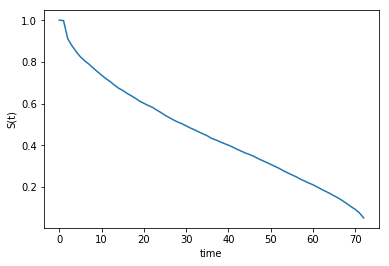

In [20]:
empirical_survival_function['time'] = empirical_survival_function.index
sns.lineplot( x="time", y= 'S(t)',
             data = empirical_survival_function)

In [21]:
empirical_survival_function['-log(S(t))'] = (-1)*np.log(empirical_survival_function['S(t)'])

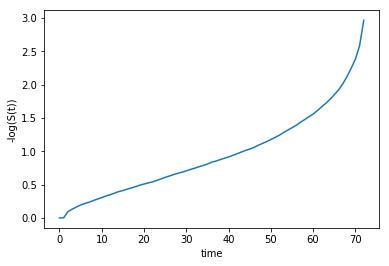

In [22]:
sns.lineplot( x="time", y= '-log(S(t))',
             data = empirical_survival_function)

In [23]:
#Use of Kaplan-Meier estimates to better understand structure of the data

In [24]:
KM_survival_function = data.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function['At risk'] = len(data)
for i in range(1, len(KM_survival_function)):
    KM_survival_function.loc[i, 'At risk'] = KM_survival_function.loc[i-1, 'At risk'] - KM_survival_function.loc[i-1, 'customerID']
KM_survival_function['Survived'] = len(data)
for i in range(0, len(KM_survival_function)):
    KM_survival_function.loc[i, 'Survived'] = KM_survival_function.loc[i, 'At risk'] - KM_survival_function.loc[i, 'customerID']
KM_survival_function['KM_S(t)'] = KM_survival_function.loc[0, 'Survived']/KM_survival_function.loc[0, 'At risk']
for i in range(1, len(KM_survival_function)):
    KM_survival_function.loc[i, 'KM_S(t)'] = (KM_survival_function.loc[i, 'Survived'] / KM_survival_function.loc[i, 'At risk'])*KM_survival_function.loc[i-1, 'KM_S(t)']
KM_survival_function['time'] = KM_survival_function.index

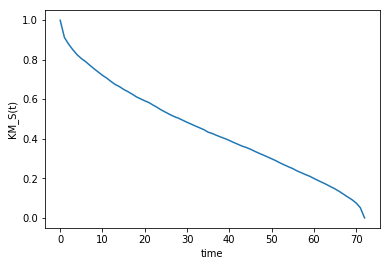

In [25]:
sns.lineplot( x="time", y= 'KM_S(t)',
             data = KM_survival_function)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



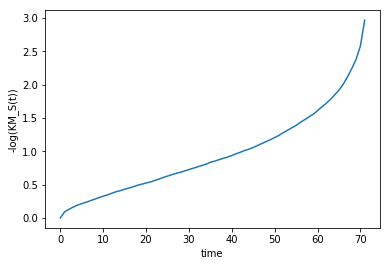

In [26]:
KM_survival_function['-log(KM_S(t))'] = (-1)*np.log(KM_survival_function['KM_S(t)'])
sns.lineplot( x="time", y= '-log(KM_S(t))',
             data = KM_survival_function)


## Goodness of fit of exponential distribution

In [27]:
y = KM_survival_function.iloc[:-1,-1]
X = KM_survival_function.iloc[:-1,-2]
X = st.add_constant(X, prepend=False)
linearmodel_exp = st.OLS(y,X)
results = linearmodel_exp.fit()

In [28]:
fitted_exp = pd.DataFrame(data = results.fittedvalues, columns=[ 'fitted'])
fitted_exp['time'] = fitted_exp.index 

## Goodness of fit of Weibull distribution

In [29]:
KM_survival_function['log(-ln(S(t)))'] = np.log(KM_survival_function['-log(KM_S(t))'])
KM_survival_function['log(Time)'] = np.log(KM_survival_function['time'])


y = KM_survival_function.iloc[1:-1,-2]
X = KM_survival_function.iloc[1:-1,-1]
X = st.add_constant(X, prepend=False)
linearmodel_wei = st.OLS(y,X)
results = linearmodel_wei.fit()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



In [30]:
fitted_wei = pd.DataFrame(data = results.fittedvalues, columns=[ 'fitted'])
fitted_wei['log(Time)'] = np.log(fitted_wei.index)


## Goodness of fit of Log-logistic distribution

In [31]:
KM_survival_function['-(ln(S(t)/(1-S(t))))'] = -(np.log(KM_survival_function['KM_S(t)'])/(1-np.log(KM_survival_function['KM_S(t)'])))


y = KM_survival_function.iloc[1:-1,-1]
X = KM_survival_function.iloc[1:-1,-2]
X = st.add_constant(X, prepend=False)
linearmodel_log = st.OLS(y,X)
results = linearmodel_log.fit()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



In [32]:
fitted_log = pd.DataFrame(data = results.fittedvalues, columns=[ 'fitted'])
fitted_log['log(Time)'] = np.log(fitted_log.index)

## Goodness of fit of Gompertz distribution

In [33]:
f_h_neg = -np.log(KM_survival_function.iloc[0:-3,-6])
f = np.log(KM_survival_function.iloc[1:-2,-6])
f_h_pos= -np.log(KM_survival_function.iloc[2:-1,-6])
time = KM_survival_function.iloc[1:-1,-5]

gompertz_hazard = []
gompertz_hazard.append(0)

for index in range(len(f)):
    two_points_dif = (f_h_pos.iloc[index]-f_h_neg.iloc[index])/2
    gompertz_hazard.append(two_points_dif)
    

y = gompertz_hazard
X = time
X = st.add_constant(X,prepend=False)
linearmodel = st.OLS(y,X)
linearmodelresults = linearmodel.fit()


In [34]:
fitted_gom = pd.DataFrame(data = linearmodelresults.fittedvalues, columns=[ 'fitted'])
fitted_gom['time'] = fitted_gom.index

values_gom = pd.DataFrame(data = gompertz_hazard, columns=[ '-dlog(S(t))/dt'])
values_gom['time'] = values_gom.index

# Graphicall methods to analyze goodness of fit of PH assumption

In [35]:
#Assessing goodness of PH assumption by gender

In [36]:
data_male = data[data['gender'] == 'Male']
data_female = data[data['gender'] == 'Female']

In [37]:
#Data male KM curve
KM_survival_function_male = data_male.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function_male['At risk'] = len(data_male)
for i in range(1, len(KM_survival_function_male)):
    KM_survival_function_male.loc[i, 'At risk'] = KM_survival_function_male.loc[i-1, 'At risk'] - KM_survival_function_male.loc[i-1, 'customerID']
KM_survival_function_male['Survived'] = len(data_male)
for i in range(0, len(KM_survival_function_male)):
    KM_survival_function_male.loc[i, 'Survived'] = KM_survival_function_male.loc[i, 'At risk'] - KM_survival_function_male.loc[i, 'customerID']
KM_survival_function_male['KM_S(t)_male'] = KM_survival_function_male.loc[0, 'Survived']/KM_survival_function_male.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_male)):
    KM_survival_function_male.loc[i, 'KM_S(t)_male'] = (KM_survival_function_male.loc[i, 'Survived'] / KM_survival_function_male.loc[i, 'At risk'])*KM_survival_function_male.loc[i-1, 'KM_S(t)_male']
KM_survival_function_male['time'] = KM_survival_function_male.index

In [38]:
#Data female KM curve
KM_survival_function_female = data_female.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function_female['At risk'] = len(data_male)
for i in range(1, len(KM_survival_function_male)):
    KM_survival_function_female.loc[i, 'At risk'] = KM_survival_function_female.loc[i-1, 'At risk'] - KM_survival_function_female.loc[i-1, 'customerID']
KM_survival_function_female['Survived'] = len(data_male)
for i in range(0, len(KM_survival_function_female)):
    KM_survival_function_female.loc[i, 'Survived'] = KM_survival_function_female.loc[i, 'At risk'] - KM_survival_function_female.loc[i, 'customerID']
KM_survival_function_female['KM_S(t)_female'] = KM_survival_function_female.loc[0, 'Survived']/KM_survival_function_female.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_female)):
    KM_survival_function_female.loc[i, 'KM_S(t)_female'] = (KM_survival_function_female.loc[i, 'Survived'] / KM_survival_function_female.loc[i, 'At risk'])*KM_survival_function_female.loc[i-1, 'KM_S(t)_female']
KM_survival_function_female['time'] = KM_survival_function_female.index

In [39]:
KM_survival_function_gender = pd.merge(KM_survival_function_female,KM_survival_function_male, left_on='time', right_on='time')

In [40]:
KM_survival_function_gender['log(-log(S(t)))_female'] = np.log((-1)*np.log(KM_survival_function_gender['KM_S(t)_female']))
KM_survival_function_gender['log(-log(S(t)))_male'] = np.log((-1)*np.log(KM_survival_function_gender['KM_S(t)_male']))
KM_survival_function_gender['log(time)'] = np.log(KM_survival_function_gender['time'])

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log



In [41]:
KM_survival_function_gender = KM_survival_function_gender.loc [:,['log(time)','log(-log(S(t)))_male','log(-log(S(t)))_female']]
KM_survival_function_gender_melt = KM_survival_function_gender.melt('log(time)', var_name='gender',  value_name='log(-log(S(t)))')


In [42]:
#Proportionality graph
KM_survival_function_gender['Female_male_dif']= KM_survival_function_gender['log(-log(S(t)))_female'] - KM_survival_function_gender['log(-log(S(t)))_male']

In [43]:
#assessing PH assumptions on senior citizenship (age)

In [44]:
data_SeniorYes = data[data['SeniorCitizen'] == 1]
data_SeniorNo = data[data['SeniorCitizen'] == 0]

In [45]:
#Data Senior KM curve
KM_survival_function_SeniorYes = data_SeniorYes.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function_SeniorYes.loc[0] = [0]  # adding a row
KM_survival_function_SeniorYes = KM_survival_function_SeniorYes.sort_index()

KM_survival_function_SeniorYes['At risk'] = len(data_SeniorYes)
for i in range(1, len(KM_survival_function_SeniorYes)):
    KM_survival_function_SeniorYes.loc[i, 'At risk'] = KM_survival_function_SeniorYes.loc[i-1, 'At risk'] - KM_survival_function_SeniorYes.loc[i-1, 'customerID']
KM_survival_function_SeniorYes['Survived'] = len(data_SeniorYes)
for i in range(0, len(KM_survival_function_SeniorYes)):
    KM_survival_function_SeniorYes.loc[i, 'Survived'] = KM_survival_function_SeniorYes.loc[i, 'At risk'] - KM_survival_function_SeniorYes.loc[i, 'customerID']
KM_survival_function_SeniorYes['KM_S(t)_SeniorYes'] = KM_survival_function_SeniorYes.loc[0, 'Survived']/KM_survival_function_SeniorYes.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_SeniorYes)):
    KM_survival_function_SeniorYes.loc[i, 'KM_S(t)_SeniorYes'] = (KM_survival_function_SeniorYes.loc[i, 'Survived'] / KM_survival_function_SeniorYes.loc[i, 'At risk'])*KM_survival_function_SeniorYes.loc[i-1, 'KM_S(t)_SeniorYes']
KM_survival_function_SeniorYes['time'] = KM_survival_function_SeniorYes.index

In [46]:
#Data Not senior KM curve
KM_survival_function_SeniorNo = data_SeniorNo.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function_SeniorNo['At risk'] = len(data_SeniorNo)
for i in range(1, len(KM_survival_function_SeniorNo)):
    KM_survival_function_SeniorNo.loc[i, 'At risk'] = KM_survival_function_SeniorNo.loc[i-1, 'At risk'] - KM_survival_function_SeniorNo.loc[i-1, 'customerID']
KM_survival_function_SeniorNo['Survived'] = len(data_SeniorNo)
for i in range(0, len(KM_survival_function_SeniorNo)):
    KM_survival_function_SeniorNo.loc[i, 'Survived'] = KM_survival_function_SeniorNo.loc[i, 'At risk'] - KM_survival_function_SeniorNo.loc[i, 'customerID']
KM_survival_function_SeniorNo['KM_S(t)_SeniorNo'] = KM_survival_function_SeniorNo.loc[0, 'Survived']/KM_survival_function_SeniorNo.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_SeniorNo)):
    KM_survival_function_SeniorNo.loc[i, 'KM_S(t)_SeniorNo'] = (KM_survival_function_SeniorNo.loc[i, 'Survived'] / KM_survival_function_SeniorNo.loc[i, 'At risk'])*KM_survival_function_SeniorNo.loc[i-1, 'KM_S(t)_SeniorNo']
KM_survival_function_SeniorNo['time'] = KM_survival_function_SeniorNo.index

In [47]:
KM_survival_function_senior = pd.merge(KM_survival_function_SeniorNo,KM_survival_function_SeniorYes,on='time')

KM_survival_function_senior['log(-log(S(t)))_SeniorNo'] = np.log((-1)*np.log(KM_survival_function_senior['KM_S(t)_SeniorNo']))
KM_survival_function_senior['log(-log(S(t)))_SeniorYes'] = np.log((-1)*np.log(KM_survival_function_senior['KM_S(t)_SeniorYes']))
KM_survival_function_senior['log(time)'] = np.log(KM_survival_function_senior['time'])

KM_survival_function_senior = KM_survival_function_senior.loc [:,['log(time)','log(-log(S(t)))_SeniorNo','log(-log(S(t)))_SeniorYes']]
KM_survival_function_senior_melt = KM_survival_function_senior.melt('log(time)', var_name='Senior Citizen',  value_name='log(-log(S(t)))')

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log



In [48]:
KM_survival_function_senior['SeniorYes_No_dif'] = KM_survival_function_senior['log(-log(S(t)))_SeniorYes'] - KM_survival_function_senior['log(-log(S(t)))_SeniorNo']

In [49]:
#assessing PH assumption on type of service

In [50]:
data_FOYes = data[data['Fiber opticDumInternetService'] == 1]
data_DSLYes = data[data['DSLDumInternetService'] == 1]
data_InternetN0 = data[(data['Fiber opticDumInternetService'] == 0) & (data.DSLDumInternetService == 0)]

In [51]:
#Data Fiber Optic KM curve
KM_survival_function_FOYes = data_FOYes.groupby('tenure').agg({ 'customerID':'count'})

KM_survival_function_FOYes.loc[0] = [0]  # adding a row
KM_survival_function_FOYes = KM_survival_function_FOYes.sort_index() 

In [52]:

KM_survival_function_FOYes['At risk'] = len(data_FOYes)
for i in range(1, len(KM_survival_function_FOYes)):
    KM_survival_function_FOYes.loc[i, 'At risk'] = KM_survival_function_FOYes.loc[i-1, 'At risk'] - KM_survival_function_FOYes.loc[i-1, 'customerID']
KM_survival_function_FOYes['Survived'] = len(data_FOYes)
for i in range(0, len(KM_survival_function_FOYes)):
    KM_survival_function_FOYes.loc[i, 'Survived'] = KM_survival_function_FOYes.loc[i, 'At risk'] - KM_survival_function_FOYes.loc[i, 'customerID']
KM_survival_function_FOYes['KM_S(t)_FOYes'] = KM_survival_function_FOYes.loc[0, 'Survived']/KM_survival_function_FOYes.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_FOYes)):
    KM_survival_function_FOYes.loc[i, 'KM_S(t)_FOYes'] = (KM_survival_function_FOYes.loc[i, 'Survived'] / KM_survival_function_FOYes.loc[i, 'At risk'])*KM_survival_function_FOYes.loc[i-1, 'KM_S(t)_FOYes']
KM_survival_function_FOYes['time'] = KM_survival_function_FOYes.index

In [53]:
#Data DSL KM curve
KM_survival_function_DSLYes = data_DSLYes.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function_DSLYes['At risk'] = len(data_DSLYes)
for i in range(1, len(KM_survival_function_DSLYes)):
    KM_survival_function_DSLYes.loc[i, 'At risk'] = KM_survival_function_DSLYes.loc[i-1, 'At risk'] - KM_survival_function_DSLYes.loc[i-1, 'customerID']
KM_survival_function_DSLYes['Survived'] = len(data_DSLYes)
for i in range(0, len(KM_survival_function_DSLYes)):
    KM_survival_function_DSLYes.loc[i, 'Survived'] = KM_survival_function_DSLYes.loc[i, 'At risk'] - KM_survival_function_DSLYes.loc[i, 'customerID']
KM_survival_function_DSLYes['KM_S(t)_DSLYes'] = KM_survival_function_DSLYes.loc[0, 'Survived']/KM_survival_function_DSLYes.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_DSLYes)):
    KM_survival_function_DSLYes.loc[i, 'KM_S(t)_DSLYes'] = (KM_survival_function_DSLYes.loc[i, 'Survived'] / KM_survival_function_DSLYes.loc[i, 'At risk'])*KM_survival_function_DSLYes.loc[i-1, 'KM_S(t)_DSLYes']
KM_survival_function_DSLYes['time'] = KM_survival_function_DSLYes.index

In [54]:
#Data No internet service KM curve

KM_survival_function_InternetN0 = data_InternetN0.groupby('tenure').agg({ 'customerID':'count'})

KM_survival_function_InternetN0['At risk'] = len(data_InternetN0)
for i in range(1, len(KM_survival_function_InternetN0)):
    KM_survival_function_InternetN0.loc[i, 'At risk'] = KM_survival_function_InternetN0.loc[i-1, 'At risk'] - KM_survival_function_InternetN0.loc[i-1, 'customerID']
KM_survival_function_InternetN0['Survived'] = len(data_InternetN0)
for i in range(0, len(KM_survival_function_InternetN0)):
    KM_survival_function_InternetN0.loc[i, 'Survived'] = KM_survival_function_InternetN0.loc[i, 'At risk'] - KM_survival_function_InternetN0.loc[i, 'customerID']
KM_survival_function_InternetN0['KM_S(t)_InternetN0'] = KM_survival_function_InternetN0.loc[0, 'Survived']/KM_survival_function_InternetN0.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_InternetN0)):
    KM_survival_function_InternetN0.loc[i, 'KM_S(t)_InternetN0'] = (KM_survival_function_InternetN0.loc[i, 'Survived'] / KM_survival_function_InternetN0.loc[i, 'At risk'])*KM_survival_function_InternetN0.loc[i-1, 'KM_S(t)_InternetN0']
KM_survival_function_InternetN0['time'] = KM_survival_function_InternetN0.index
 

In [55]:

KM_survival_function_internet = pd.merge(pd.merge(KM_survival_function_DSLYes,KM_survival_function_FOYes,on='time'),KM_survival_function_InternetN0,on='time')

KM_survival_function_internet['log(-log(S(t)))_DSLYes'] = np.log((-1)*np.log(KM_survival_function_internet['KM_S(t)_DSLYes']))
KM_survival_function_internet['log(-log(S(t)))_FOYes'] = np.log((-1)*np.log(KM_survival_function_internet['KM_S(t)_FOYes']))
KM_survival_function_internet['log(-log(S(t)))_InternetN0'] = np.log((-1)*np.log(KM_survival_function_internet['KM_S(t)_InternetN0']))
KM_survival_function_internet['log(time)'] = np.log(KM_survival_function_internet['time'])

KM_survival_function_internet = KM_survival_function_internet.loc [:,['log(time)','log(-log(S(t)))_DSLYes','log(-log(S(t)))_FOYes','log(-log(S(t)))_InternetN0']]
KM_survival_function_internet_melt = KM_survival_function_internet.melt('log(time)', var_name='internet',  value_name='log(-log(S(t)))')


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log



In [56]:
#Difference curve
KM_survival_function_internet['DSLYes_FOYes_dif'] = KM_survival_function_internet['log(-log(S(t)))_DSLYes'] - KM_survival_function_internet['log(-log(S(t)))_FOYes']
KM_survival_function_internet['DSLYes_InternetNO_dif'] = KM_survival_function_internet['log(-log(S(t)))_DSLYes'] - KM_survival_function_internet['log(-log(S(t)))_InternetN0']
KM_survival_function_internet['InternetNO_FOYes_dif'] = KM_survival_function_internet['log(-log(S(t)))_InternetN0'] - KM_survival_function_internet['log(-log(S(t)))_FOYes']


KM_survival_function_internet_dif = KM_survival_function_internet.loc [:,['log(time)','DSLYes_FOYes_dif','DSLYes_InternetNO_dif','InternetNO_FOYes_dif']]
KM_survival_function_internet_dif = KM_survival_function_internet_dif.melt('log(time)', var_name='Differences',  value_name='Difference')


In [57]:
# Assessing PH assuption on Type of payment

In [58]:
data_BankTransAuto = data[data['Bank transfer (automatic)DumPaymentMethod'] == 1]
data_CredCardAuto = data[data['Credit card (automatic)DumPaymentMethod'] == 1]
data_ElecCheck = data[data['Electronic checkDumPaymentMethod'] == 1]
data_MailCheck = data[(data['Bank transfer (automatic)DumPaymentMethod'] == 0) & (data['Credit card (automatic)DumPaymentMethod'] == 0) &(data['Electronic checkDumPaymentMethod'] == 0) ]

In [59]:
#Data BankTransAuto KM curve
KM_survival_function_BankTransAuto = data_BankTransAuto.groupby('tenure').agg({ 'customerID':'count'})

KM_survival_function_BankTransAuto['At risk'] = len(data_BankTransAuto)
for i in range(1, len(KM_survival_function_BankTransAuto)):
    KM_survival_function_BankTransAuto.loc[i, 'At risk'] = KM_survival_function_BankTransAuto.loc[i-1, 'At risk'] - KM_survival_function_BankTransAuto.loc[i-1, 'customerID']
KM_survival_function_BankTransAuto['Survived'] = len(data_BankTransAuto)
for i in range(0, len(KM_survival_function_BankTransAuto)):
    KM_survival_function_BankTransAuto.loc[i, 'Survived'] = KM_survival_function_BankTransAuto.loc[i, 'At risk'] - KM_survival_function_BankTransAuto.loc[i, 'customerID']
KM_survival_function_BankTransAuto['KM_S(t)_BankTransAuto'] = KM_survival_function_BankTransAuto.loc[0, 'Survived']/KM_survival_function_BankTransAuto.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_BankTransAuto)):
    KM_survival_function_BankTransAuto.loc[i, 'KM_S(t)_BankTransAuto'] = (KM_survival_function_BankTransAuto.loc[i, 'Survived'] / KM_survival_function_BankTransAuto.loc[i, 'At risk'])*KM_survival_function_BankTransAuto.loc[i-1, 'KM_S(t)_BankTransAuto']
KM_survival_function_BankTransAuto['time'] = KM_survival_function_BankTransAuto.index

In [60]:
#Data No Credit card automatic service KM curve

KM_survival_function_CredCardAuto = data_CredCardAuto.groupby('tenure').agg({ 'customerID':'count'})

KM_survival_function_CredCardAuto['At risk'] = len(data_CredCardAuto)
for i in range(1, len(KM_survival_function_CredCardAuto)):
    KM_survival_function_CredCardAuto.loc[i, 'At risk'] = KM_survival_function_CredCardAuto.loc[i-1, 'At risk'] - KM_survival_function_CredCardAuto.loc[i-1, 'customerID']
KM_survival_function_CredCardAuto['Survived'] = len(data_CredCardAuto)
for i in range(0, len(KM_survival_function_CredCardAuto)):
    KM_survival_function_CredCardAuto.loc[i, 'Survived'] = KM_survival_function_CredCardAuto.loc[i, 'At risk'] - KM_survival_function_CredCardAuto.loc[i, 'customerID']
KM_survival_function_CredCardAuto['KM_S(t)_CredCardAuto'] = KM_survival_function_CredCardAuto.loc[0, 'Survived']/KM_survival_function_CredCardAuto.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_CredCardAuto)):
    KM_survival_function_CredCardAuto.loc[i, 'KM_S(t)_CredCardAuto'] = (KM_survival_function_CredCardAuto.loc[i, 'Survived'] / KM_survival_function_CredCardAuto.loc[i, 'At risk'])*KM_survival_function_CredCardAuto.loc[i-1, 'KM_S(t)_CredCardAuto']
KM_survival_function_CredCardAuto['time'] = KM_survival_function_CredCardAuto.index
 

In [61]:
#Data Electronic check KM curve

KM_survival_function_ElecCheck = data_ElecCheck.groupby('tenure').agg({ 'customerID':'count'})
KM_survival_function_ElecCheck.loc[0] = [0]  # adding a row
KM_survival_function_ElecCheck = KM_survival_function_ElecCheck.sort_index()

KM_survival_function_ElecCheck['At risk'] = len(data_ElecCheck)
for i in range(1, len(KM_survival_function_ElecCheck)):
    KM_survival_function_ElecCheck.loc[i, 'At risk'] = KM_survival_function_ElecCheck.loc[i-1, 'At risk'] - KM_survival_function_ElecCheck.loc[i-1, 'customerID']
KM_survival_function_ElecCheck['Survived'] = len(data_ElecCheck)
for i in range(0, len(KM_survival_function_ElecCheck)):
    KM_survival_function_ElecCheck.loc[i, 'Survived'] = KM_survival_function_ElecCheck.loc[i, 'At risk'] - KM_survival_function_ElecCheck.loc[i, 'customerID']
KM_survival_function_ElecCheck['KM_S(t)_ElecCheck'] = KM_survival_function_ElecCheck.loc[0, 'Survived']/KM_survival_function_ElecCheck.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_ElecCheck)):
    KM_survival_function_ElecCheck.loc[i, 'KM_S(t)_ElecCheck'] = (KM_survival_function_ElecCheck.loc[i, 'Survived'] / KM_survival_function_ElecCheck.loc[i, 'At risk'])*KM_survival_function_ElecCheck.loc[i-1, 'KM_S(t)_ElecCheck']
KM_survival_function_ElecCheck['time'] = KM_survival_function_ElecCheck.index
 

In [62]:
#Data Mail check KM curve

KM_survival_function_MailCheck = data_MailCheck.groupby('tenure').agg({ 'customerID':'count'})

KM_survival_function_MailCheck['At risk'] = len(data_MailCheck)
for i in range(1, len(KM_survival_function_MailCheck)):
    KM_survival_function_MailCheck.loc[i, 'At risk'] = KM_survival_function_MailCheck.loc[i-1, 'At risk'] - KM_survival_function_MailCheck.loc[i-1, 'customerID']
KM_survival_function_MailCheck['Survived'] = len(data_MailCheck)
for i in range(0, len(KM_survival_function_MailCheck)):
    KM_survival_function_MailCheck.loc[i, 'Survived'] = KM_survival_function_MailCheck.loc[i, 'At risk'] - KM_survival_function_MailCheck.loc[i, 'customerID']
KM_survival_function_MailCheck['KM_S(t)_MailCheck'] = KM_survival_function_MailCheck.loc[0, 'Survived']/KM_survival_function_MailCheck.loc[0, 'At risk']
for i in range(1, len(KM_survival_function_MailCheck)):
    KM_survival_function_MailCheck.loc[i, 'KM_S(t)_MailCheck'] = (KM_survival_function_MailCheck.loc[i, 'Survived'] / KM_survival_function_MailCheck.loc[i, 'At risk'])*KM_survival_function_MailCheck.loc[i-1, 'KM_S(t)_MailCheck']
KM_survival_function_MailCheck['time'] = KM_survival_function_MailCheck.index

In [63]:
KM_survival_function_payment = pd.merge(pd.merge(pd.merge(KM_survival_function_BankTransAuto,KM_survival_function_CredCardAuto,on='time'),KM_survival_function_ElecCheck,on='time'),KM_survival_function_MailCheck,on='time')

KM_survival_function_payment['log(-log(S(t)))_BankTransAuto'] = np.log((-1)*np.log(KM_survival_function_payment['KM_S(t)_BankTransAuto']))
KM_survival_function_payment['log(-log(S(t)))_CredCardAuto'] = np.log((-1)*np.log(KM_survival_function_payment['KM_S(t)_CredCardAuto']))
KM_survival_function_payment['log(-log(S(t)))_ElecCheck'] = np.log((-1)*np.log(KM_survival_function_payment['KM_S(t)_ElecCheck']))
KM_survival_function_payment['log(-log(S(t)))_MailCheck'] = np.log((-1)*np.log(KM_survival_function_payment['KM_S(t)_MailCheck']))
KM_survival_function_payment['log(time)'] = np.log(KM_survival_function_payment['time'])

KM_survival_function_payment = KM_survival_function_payment.loc [:,['log(time)','log(-log(S(t)))_BankTransAuto','log(-log(S(t)))_CredCardAuto','log(-log(S(t)))_ElecCheck','log(-log(S(t)))_MailCheck']]
KM_survival_function_payment_melt = KM_survival_function_payment.melt('log(time)', var_name='payment',  value_name='log(-log(S(t)))')


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log



In [64]:
#Difference

KM_survival_function_payment['Bank_Credit_dif'] = KM_survival_function_payment['log(-log(S(t)))_BankTransAuto'] - KM_survival_function_payment['log(-log(S(t)))_CredCardAuto'] 
KM_survival_function_payment['Bank_Elec_dif'] = KM_survival_function_payment['log(-log(S(t)))_BankTransAuto'] - KM_survival_function_payment['log(-log(S(t)))_ElecCheck'] 
KM_survival_function_payment['Bank_Check_dif'] = KM_survival_function_payment['log(-log(S(t)))_BankTransAuto'] - KM_survival_function_payment['log(-log(S(t)))_MailCheck']
KM_survival_function_payment['Credit_Elec_dif'] = KM_survival_function_payment['log(-log(S(t)))_CredCardAuto'] - KM_survival_function_payment['log(-log(S(t)))_ElecCheck']
KM_survival_function_payment['Credit_Mail_dif'] = KM_survival_function_payment['log(-log(S(t)))_CredCardAuto'] - KM_survival_function_payment['log(-log(S(t)))_MailCheck']
KM_survival_function_payment['Elec_Mail_dif'] = KM_survival_function_payment['log(-log(S(t)))_ElecCheck'] - KM_survival_function_payment['log(-log(S(t)))_MailCheck']
 



KM_survival_function_payment_dif = KM_survival_function_payment.loc [:,['log(time)','Bank_Credit_dif','Bank_Elec_dif','Bank_Check_dif','Credit_Elec_dif','Credit_Mail_dif','Elec_Mail_dif']]
KM_survival_function_payment_dif = KM_survival_function_payment_dif.melt('log(time)', var_name='Differences',  value_name='Difference')


In [65]:
#Main results: see Results section

 ### Parametric models estimation: definition of likelihood function and maximizer

Lifelines package computes survival function for exponential and weibull but univariate only and not for Log-logistic and Gompertz. Thus,we stablish the log-likelihood and maximize without the package. It is loaded only to check correctness

In [66]:
#Correctness of exponential with Lifelines package
T = data['tenure']
censored = pd.get_dummies(data['Churn'])
censored = censored.iloc[:,1]

exf = ExponentialFitter().fit(T, censored, label='ExponentalFitter')
exf.print_summary()

<lifelines.ExponentialFitter: fitted with 7043 observations, 5174 censored>
number of subjects = 7043
  number of events = 1869
    log-likelihood = -10847.486

          coef  se(coef)  lower 0.95  upper 0.95      p     
lambda_ 0.0082    0.0001      0.0080      0.0084 0.0000  ***
---
Signif. codes: 0 '***' 0.0001 '**' 0.001 '*' 0.01 '.' 0.05 ' ' 1



In [67]:
#Log-likelihood of the exponential distribution
def log_like_exp_PH(time,X,beta):
    #hazard includes a column vector of 1's which is an exponential transformation of the base hazard (lambda0)
    hazard = np.exp(np.dot(X,beta))
    ll = censored * np.log(hazard) - (hazard * time)    
    return ll 

In [68]:
#log-likelihood of the weibull distribution
def log_like_wei_PH(time,X,beta,p):
    hazard = np.exp(np.dot(X,beta))
    ll = censored * np.log(hazard * p * np.power(time, (p - 1))) - (hazard * np.power(time,p))
    return ll

In [69]:
#log-likelihood of the log-log distribution
def log_like_log_PH(time,X,beta,theta):
    hazard = np.exp(np.dot(X,beta))
    ll = censored * (np.log(hazard * theta * np.power(time,theta - 1))-np.log(1 + hazard * np.power(time,theta)) + np.log(1)-np.log(1 + hazard * np.power(time,theta)))    
    return ll

In [70]:
#log-likelihood of the gompertz distribution
def log_like_gom_PH(time,X,beta,theta):
    hazard = np.exp(np.dot(X,beta))
    ll = censored * (np.log(hazard) + theta * time) - (hazard * (np.exp(theta * time) - 1) / theta)    
    return ll

In [71]:
#############################################################################

In [72]:
#Maximum likelihood estimation exponential PH

In [73]:
#Pass a list with the regressors you want
list_of_variables_intercept = ['Intercept']

In [74]:
#Generate a matrix with the variables selected
def covariates_matrix(dataset,list_of_regressors):
    columns_X_matrix = list_of_regressors
    X_data = pd.DataFrame(dataset, columns=columns_X_matrix)
    X_matrix = pd.DataFrame.as_matrix(X_data)
    try:
        var_cov_matrix = np.cov(X_matrix)
    except:
        var_cov_matrix = 0
    
    return {'X_matrix':X_matrix, 'var_cov_matrix':var_cov_matrix} 

In [75]:
#Exponential model maximum likelihood extimator
from statsmodels.base.model import GenericLikelihoodModel

class ExponentialPH(GenericLikelihoodModel):
    def _init_(self,endog,exog,**kwds):
        super(ExponentialPH, self).__init__(endog,exog,**kwds)
    def nloglikeobs(self,params):
        ll = log_like_exp_PH(self.endog,self.exog,params)
        return -ll
    def fit(self, start_params = None, maxiter = 100,maxfun = 5000,**kwds):
        if start_params == None:
            start_params = initial_betas 
        return super(ExponentialPH, self).fit(start_params = start_params, method = 'ncg',maxiter = maxiter, maxfun = maxfun,**kwds)

In [76]:
#Weibull model maximum likelihood extimator
class WeibullPH(GenericLikelihoodModel):
    def _init_(self,endog,exog,**kwds):
        super(WeibullPH, self).__init__(endog,exog,**kwds)
    def nloglikeobs(self,params):
        p = params[-1]
        beta = params[:-1]
        ll = log_like_wei_PH(self.endog,self.exog,beta,p)
        return -ll
    def fit(self, start_params = None, maxiter = 10000,maxfun = 5000,**kwds):
        if len(self.exog_names) == len(self.exog[1]):
            self.exog_names.append('p')        
        if start_params == None:
            start_params = initial_betas 
        return super(WeibullPH, self).fit(start_params = start_params,method = 'ncg',maxiter = maxiter, maxfun = maxfun,**kwds)

In [77]:
#Log-logistic model maximum likelihood extimator
class LoglogisticPH(GenericLikelihoodModel):
    def _init_(self,endog,exog,**kwds):
        super(LoglogisticPH, self).__init__(endog,exog,**kwds)
    def nloglikeobs(self,params):
        theta = params[-1]
        beta = params[:-1]
        ll = log_like_log_PH(self.endog,self.exog,beta,theta)
        return -ll
    def fit(self, start_params = None, maxiter = 10000,maxfun = 5000,**kwds):
        if len(self.exog_names) == len(self.exog[1]):
            self.exog_names.append('theta')        
        if start_params == None:
            start_params = initial_betas
        return super(LoglogisticPH, self).fit(start_params = start_params, method = 'ncg',maxiter = maxiter, maxfun = maxfun,**kwds)

In [78]:
#Gompertz model maximum likelihood extimator
class GompertzPH(GenericLikelihoodModel):
    def _init_(self,endog,exog,**kwds):
        super(GompertzPH, self).__init__(endog,exog,**kwds)
    def nloglikeobs(self,params):
        theta = params[-1]
        beta = params[:-1]
        ll = log_like_gom_PH(self.endog,self.exog,beta,theta)
        return -ll
    def fit(self, start_params = None, maxiter = 10000,maxfun = 5000,**kwds):
        if len(self.exog_names) == len(self.exog[1]):
            self.exog_names.append('theta')        
        if start_params == None:
            start_params = initial_betas 
        return super(GompertzPH, self).fit(start_params = start_params,method = 'ncg',maxiter = maxiter, maxfun = maxfun,**kwds)

In [79]:
#########################################################

In [80]:
#Pass a matrix of covariates to do ExponentialPH model
def do_model_exponential(X_matrix):
    model_exponentialph = ExponentialPH(time_to_event,X_matrix)
    results_expPH = model_exponentialph.fit()
    return results_expPH


In [81]:
def do_model_weibull(X_matrix):

    model_weibullph = WeibullPH(time_to_event,X_matrix)
    results_weiPH = model_weibullph.fit()
    return results_weiPH

In [82]:
def do_model_gompertz(X_matrix):

    model_gompertzph = GompertzPH(time_to_event,X_matrix)
    results_gompPH = model_gompertzph.fit()
    return results_gompPH

In [83]:

def do_model_loglog(X_matrix):

    model_loglogisticph = LoglogisticPH(time_to_event,X_matrix)
    results_loglogPH = model_loglogisticph.fit()
    return results_loglogPH

### Model estimation, only intercept (no covariates)

In [84]:
X = covariates_matrix(data,list_of_variables_intercept)
X_matrix_intercept = X['X_matrix']

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/gsitges/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning:

divide by zero encountered in true_divide

/home/gsitges/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning:

invalid value encountered in multiply



Notice that, as oposed to lifelines packages, our model includes the constant in the exponetiation of parameters. Thus, to recover lambda, we need to take the log of the constant obtained

#### Exponential distribution

In [85]:
initial_betas = np.transpose(np.repeat(1,X_matrix_intercept.shape[1]))
initial_betas

array([1])

In [86]:
exponential_intercept = do_model_exponential(X_matrix_intercept)

Optimization terminated successfully.
         Current function value: 1.540180
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 20
         Hessian evaluations: 10


#### Weibull model distribution

In [87]:
initial_betas = np.transpose(np.repeat(1,X_matrix_intercept.shape[1]+1))
initial_betas


array([1, 1])

In [88]:
weibull_intercept = do_model_weibull(X_matrix_intercept)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in power



Optimization terminated successfully.
         Current function value: 1.501674
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in power

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in power



#### Log-logistic distribution

In [89]:
loglog_intercept = do_model_loglog(X_matrix_intercept)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in power



Optimization terminated successfully.
         Current function value: 1.037661
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 13
         Hessian evaluations: 6


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



#### Gompertz distribution

In [90]:
gompertz_intercept = do_model_gompertz(X_matrix_intercept)

Optimization terminated successfully.
         Current function value: 1.515766
         Iterations: 92
         Function evaluations: 98
         Gradient evaluations: 189
         Hessian evaluations: 92


In [91]:
#####################################################################################

#### Choice of the model based on improved AIC criterion

In [92]:
# Collet(1994): AIC = −2 log(likelihood) + 2(p + 2 + k)

In [93]:
# Improvement: AIC_sur = AIC +(2*(p+2)*(p+3))/(n-p-3)

In [94]:
#Parameters for AIC computation
obs= len(data)
covariates = 1 
k_exp = 1
k_wei_log_gom = 2

In [95]:
def AIC(log_likelihood,p,k):
    AIC = -2*log_likelihood + 2*(p+2+k)
    return AIC
        

In [96]:
def improved_AIC(log_likelihood,n,p,k):
    AIC_sur = -2*log_likelihood + 2*(p+2+k)+(2*(p+2)*(p+3)/(n-p-3))
    return AIC_sur

In [97]:
#Summary table of results applying improved AIC criterion

table_AIC_sur = {'Distribution': [], 'AIC_sur': []}
distributions = ['Exponential', 'Weibull', 'Log-logistic', 'Gompertz']
list_AIC_sur = []
ll_exp = exponential_intercept.llf
ll_wei = weibull_intercept.llf
ll_log = loglog_intercept.llf
ll_gom = gompertz_intercept.llf


AIC_sur_exp = improved_AIC(ll_exp,obs,covariates,k_exp)
list_AIC_sur.append(AIC_sur_exp)
AIC_sur_wei = improved_AIC(ll_wei,obs,covariates,k_wei_log_gom)
list_AIC_sur.append(AIC_sur_wei)
AIC_sur_log = improved_AIC(ll_log,obs,covariates,k_wei_log_gom)
list_AIC_sur.append(AIC_sur_log)
AIC_sur_gom = improved_AIC(ll_gom,obs,covariates,k_wei_log_gom)
list_AIC_sur.append(AIC_sur_gom)

table_AIC_sur['Distribution'].extend(distributions)
table_AIC_sur['AIC_sur'].extend(list_AIC_sur)

Table_AIC_sur_intercept_all = pd.DataFrame(table_AIC_sur)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in power

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



Differences between Collet and improved not very significant because n is very large, try using small sizes if still goes for log-logistic. Clearly AIC_sur criterion gives log-logistic as the best performance.

In [98]:
#############################################################################################

### Small simulation study of AIC_sur performance for small number of observations

In [99]:
#Set up
#take the most explanatory variable together with intercept: NoDumOnlineSer
#Create a random variable uniform 0,1
#Hypothesis: is AIC_sur better at identifying spurious correlation with small datasets?
#Testing we expose AIC and AIC_sur to three estimations from random small samples: 
#Model 1: Intercept + Significant variable (V1)
#Model 2: Intercept + random variable (V2)
#Model 3: Intercept + Significant variable (V1) + random variable (V2)

#We expect, both should be able to identify model 1 as better than model 2. But AIC_sur should also identify model 1 as better than model 3 with small samples

In [100]:
#generate a random variable and include as column in dataframe

data['Random']=np.round(np.random.RandomState(3).uniform(0,1,len(data)),3)

#### Small sample

In [101]:
# n= 0.002% of the whole data
table_ll_002 = {'Model 1': [], 'Model 2': [],'Model 3': []}

ll_m1_002 = []
ll_m2_002 = []
ll_m3_002 = []

reduced_data_002 = data.sample(frac=0.002, replace=False)
censored = pd.get_dummies(reduced_data_002['Churn'])
censored = censored.iloc[:,1]

for i in range(50):
    reduced_data_002 = data.sample(frac=0.002, replace=False)
    
    time_to_event = reduced_data_002.iloc[:,5].values
    censored = pd.get_dummies(reduced_data_002['Churn'])
    censored = censored.iloc[:,1]
    
    list_of_regressors= ['Intercept','NoDumOnlineSecurity']

    X_002_m1 = covariates_matrix(reduced_data_002,list_of_regressors)
    X_002_m1_matrix = X_002_m1['X_matrix'] 
    
    initial_betas = np.transpose(np.repeat(1,2))
    exponential_m1 = do_model_exponential(X_002_m1_matrix)
    ll_m1_002.append(exponential_m1.llf)
    
    list_of_regressors= ['Intercept', 'Random']

    X_002_m2 = covariates_matrix(reduced_data_002,list_of_regressors)
    X_002_m2_matrix = X_002_m2['X_matrix'] 
    
    initial_betas = np.transpose(np.repeat(1,2))
    exponential_m2 = do_model_exponential(X_002_m2_matrix)
    ll_m2_002.append(exponential_m2.llf)
    
    list_of_regressors= ['Intercept','NoDumOnlineSecurity', 'Random']

    X_002_m3 = covariates_matrix(reduced_data_002,list_of_regressors)
    X_002_m3_matrix = X_002_m3['X_matrix'] 
    
    initial_betas = np.transpose(np.repeat(1,3))
    exponential_m3 = do_model_exponential(X_002_m3_matrix)
    ll_m3_002.append(exponential_m3.llf)
    
    



/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.042340
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.252435
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.041039
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.675107
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.859363
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.582931
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.794915
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.802327
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.336692
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 202
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.719830
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.928053
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.717832
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.766932
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 38
         Hessian evaluations: 19
Optimization terminated successfully.
         Current function value: 1.947687
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11
         Current function value: 1.762419
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 2.113858
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 23
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.200346
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.100465
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 25
         Hessian evaluations: 12
         Current function value: 1.156842
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.197846
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.119050
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.988584
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.096732
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11
Optimization terminated successfully.
         Current function value: 1.984863
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.070390
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.303314
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.042597
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21
Optimization terminated successfully.
         Current function value: 1.332711
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.240029
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.239017
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 38
         Hessian evaluations: 19
Optimization terminated successfully.
         Current function value: 2.207851
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.141258
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11
Optimization terminated successfully.
         Current function value: 2.123475
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.793418
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.945829
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 0.778220
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21
         Current function value: 1.025189
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.121113
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.760960
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 2.347095
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 2.465788
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 2.271935
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.225397
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.189510
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.149466
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.947911
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 0.950767
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 0.942854
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.517375
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.677944
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.439481
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 1.011791
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.232601
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.007621
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.709172
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.831945
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.676610
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 0.947160
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.944415
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.941047
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.694398
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.937869
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.694364
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21
Optimization terminated successfully.
         Current function value: 2.275088
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.269972
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 2.268461
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
         Current function value: 0.482103
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.481944
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.471197
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.887696
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.800825
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.800105
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.503051
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.512351
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.499553
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 0.904298
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.889537
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.888408
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.639506
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.600286
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.599691
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.808396
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.874277
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.808101
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 1.156842
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.275861
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.156487
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 44
         Hessian evaluations: 22
Optimization terminated successfully.
         Current function value: 2.210898
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.210217
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11
Optimization terminated successfully.
         Current function value: 2.164762
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.824991
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.876074
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.704848
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.931379
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 0.927649
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 0.926874
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 2.077097
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.176281
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.076688
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.193107
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.249906
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.167460
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 44
         Hessian evaluations: 22
Optimization terminated successfully.
         Current function value: 1.175336
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 0.951168
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
        

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.926230
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24
         Current function value: 0.451652
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.455424
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 34
         Hessian evaluations: 17


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.426367
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.070391
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.217842
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.537342
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 47
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 1.216212
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.222180
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.214035
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.411886
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 38
         Hessian evaluations: 19
Optimization terminated successfully.
         Current function value: 1.576529
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
         Current function value: 1.158504
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.976111
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 2.224518
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
         Current function value: 1.890839
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.080658
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.253651
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.077529
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 0.930566
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.927659
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 0.897621
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.279724
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.291907
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.265508
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
         Current function value: 0.730131
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.791691
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 35
         Hessian evaluations: 17


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.491806
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21
Optimization terminated successfully.
         Current function value: 1.292622
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.321114
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.289491
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.060985
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 38
         Hessian evaluations: 19
Optimization terminated successfully.
         Current function value: 1.206544
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.060984
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.881444
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.904110
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.881041
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.028730
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 2.236381
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.743042
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 1.450731
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.656541
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1.417276
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.849320
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 0.937283
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 0.824733
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [102]:
table_ll_002['Model 1'].extend(ll_m1_002)
table_ll_002['Model 2'].extend(ll_m2_002)
table_ll_002['Model 3'].extend(ll_m3_002)
Table_ll_all_002 = pd.DataFrame(table_ll_002)

In [103]:
Table_AIC_sur_all_002 = Table_ll_all_002[:]
Table_AIC_sur_all_002['Model 1'] = Table_AIC_sur_all_002['Model 1'].apply(improved_AIC,n=len(reduced_data_002),p=2,k=1)
Table_AIC_sur_all_002['Model 2'] = Table_AIC_sur_all_002['Model 2'].apply(improved_AIC,n=len(reduced_data_002),p=2,k=1)
Table_AIC_sur_all_002['Model 3'] = Table_AIC_sur_all_002['Model 3'].apply(improved_AIC,n=len(reduced_data_002),p=3,k=1)
Table_AIC_sur_all_002['Choice']=Table_AIC_sur_all_002.idxmin(axis=1)
Table_AIC_sur_all_002['Choice'].value_counts()

Model 1    31
Model 2    13
Model 3     6
Name: Choice, dtype: int64

In [104]:
Table_AIC_all_002 = Table_ll_all_002[:]
Table_AIC_all_002['Model 1'] = Table_AIC_all_002['Model 1'].apply(AIC,p=2,k=1)
Table_AIC_all_002['Model 2'] = Table_AIC_all_002['Model 2'].apply(AIC,p=2,k=1)
Table_AIC_all_002['Model 3'] = Table_AIC_all_002['Model 3'].apply(AIC,p=3,k=1)
Table_AIC_all_002['Choice']=Table_AIC_all_002.idxmin(axis=1)
Table_AIC_all_002['Choice'].value_counts()

Model 3    27
Model 2    22
Model 1     1
Name: Choice, dtype: int64

In [105]:
#AIC_sur chooses model 1 much more times

#### Larger sample

In [106]:
# n= 0.008% of the whole data
table_ll_008 = {'Model 1': [], 'Model 2': [],'Model 3': []}

ll_m1_008 = []
ll_m2_008 = []
ll_m3_008 = []

reduced_data_008 = data.sample(frac=0.008, replace=False)
censored = pd.get_dummies(reduced_data_008['Churn'])
censored = censored.iloc[:,1]

for i in range(50):
    reduced_data_008 = data.sample(frac=0.008, replace=False)
    
    time_to_event = reduced_data_008.iloc[:,5].values
    censored = pd.get_dummies(reduced_data_008['Churn'])
    censored = censored.iloc[:,1]
    
    list_of_regressors= ['Intercept','NoDumOnlineSecurity']

    X_008_m1 = covariates_matrix(reduced_data_008,list_of_regressors)
    X_008_m1_matrix = X_008_m1['X_matrix'] 
    
    initial_betas = np.transpose(np.repeat(1,2))
    exponential_m1_008 = do_model_exponential(X_008_m1_matrix)
    ll_m1_008.append(exponential_m1_008.llf)
    
    list_of_regressors= ['Intercept', 'Random']

    X_008_m2 = covariates_matrix(reduced_data_008,list_of_regressors)
    X_008_m2_matrix = X_008_m2['X_matrix'] 
    
    initial_betas = np.transpose(np.repeat(1,2))
    exponential_m2_008 = do_model_exponential(X_008_m2_matrix)
    ll_m2_008.append(exponential_m2_008.llf)
    
    list_of_regressors= ['Intercept','NoDumOnlineSecurity', 'Random']

    X_008_m3 = covariates_matrix(reduced_data_008,list_of_regressors)
    X_008_m3_matrix = X_008_m3['X_matrix'] 
    
    initial_betas = np.transpose(np.repeat(1,3))
    exponential_m3_008 = do_model_exponential(X_008_m3_matrix)
    ll_m3_008.append(exponential_m3_008.llf)
    

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.612585
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.744988
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.610376
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.418618
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.510653
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.412270
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.179178
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.214659
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.178559
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.243858
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.345240
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.243503
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.767829
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.964680
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.757986
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 34
         Hessian evaluations: 17
Optimization terminated successfully.
         Current function value: 1.516289
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.506854
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.506371
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.181178
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.292064
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.162159
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.052277
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.123425
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.046194
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16
Optimization terminated successfully.
         Current function value: 1.362156
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.474775
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.361838
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.123722
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.113427
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.104504
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.425406
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.482192
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.422651
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.612786
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.686381
         Iterations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.608740
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.253605
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.377127
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.246991
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16
Optimization terminated successfully.
         Current function value: 1.157790
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.200980
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.150397
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.737157
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.855719
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.734790
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.851806
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.952499
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.838574
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.096888
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.261259
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.095511
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.203353
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.261537
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.197573
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.585319
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.612331
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.578543
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.188431
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.267541
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.174360
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.909835
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.062904
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.906136
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 0.990916
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.094764
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 0.986395
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.695151
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.816738
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.682509
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.292651
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.298623
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.277896
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.537854
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.609925
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.510095
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.804256
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.930610
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.803755
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.030915
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.098062
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.028018
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.363609
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.456542
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.341415
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.476792
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.558293
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.476684
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.580095
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.719678
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.574474
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.329700
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.363914
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.324702
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.356155
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.462373
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.355360
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.449537
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.515203
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.447241
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.204157
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.309345
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.204022
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.363511
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.556298
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.363501
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.606371
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.706872
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11
Optimization terminated successfully.
         Current function value: 1.603545
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.499955
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 38
         Hessian evaluations: 19
Optimization terminated successfully.
         Current function value: 1.650799
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11
         Current function value: 1.488563
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100
Optimization terminated successfully.
         Current function value: 1.563373
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.544414
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.509940
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.327723
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.355569
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.327713
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.277344
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.360341
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.277168
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.679495
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.777638
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.675880
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.471891
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.524158
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.424018
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16
Optimization terminated successfully.
         Current function value: 1.638881
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.906320
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.637403
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15
Optimization terminated successfully.
         Current function value: 1.107804
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.124495
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.104078
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.497261
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.569439
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.496807
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.714764
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.802441
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.704934
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.539357
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
Optimization terminated successfully.
         Current function value: 1.701309
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.538625
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.614564
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.646121
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
Optimization terminated successfully.
         Current function value: 1.596054
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.113152
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 40
         Hessian evaluations: 20
Optimization terminated successfully.
         Current function value: 1.299991
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12
         Current function value: 1.110434
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 200
         Hessian evaluations: 100


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.471776
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14
Optimization terminated successfully.
         Current function value: 1.541586
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.471732
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 30
         Hessian evaluations: 15


In [107]:
table_ll_008['Model 1'].extend(ll_m1_008)
table_ll_008['Model 2'].extend(ll_m2_008)
table_ll_008['Model 3'].extend(ll_m3_008)
Table_ll_all_008 = pd.DataFrame(table_ll_008)
Table_AIC_sur_all_008 = Table_ll_all_008[:]
Table_AIC_sur_all_008['Model 1'] = Table_AIC_sur_all_008['Model 1'].apply(improved_AIC,n=len(reduced_data_008),p=2,k=1)
Table_AIC_sur_all_008['Model 2'] = Table_AIC_sur_all_008['Model 2'].apply(improved_AIC,n=len(reduced_data_008),p=2,k=1)
Table_AIC_sur_all_008['Model 3'] = Table_AIC_sur_all_008['Model 3'].apply(improved_AIC,n=len(reduced_data_008),p=3,k=1)
Table_AIC_sur_all_008['Choice']=Table_AIC_sur_all_008.idxmin(axis=1)
Table_AIC_all_008 = Table_ll_all_002[:]
Table_AIC_all_008['Model 1'] = Table_AIC_all_008['Model 1'].apply(AIC,p=2,k=1)
Table_AIC_all_008['Model 2'] = Table_AIC_all_008['Model 2'].apply(AIC,p=2,k=1)
Table_AIC_all_008['Model 3'] = Table_AIC_all_008['Model 3'].apply(AIC,p=3,k=1)
Table_AIC_all_008['Choice']=Table_AIC_all_008.idxmin(axis=1)

In [108]:
Table_AIC_all_008['Choice'].value_counts()

Model 1    31
Model 2    13
Model 3     6
Name: Choice, dtype: int64

In [109]:
Table_AIC_sur_all_008['Choice'].value_counts()

Model 1    44
Model 3     4
Model 2     2
Name: Choice, dtype: int64

In [110]:
#Table for results
AIC_002_dic ={'Criterion': 'AIC', 'Model 1':5/50,'Model 2':16/50,'Model 3':29/50}
AIC_008_dic ={'Criterion': 'AIC','Model 1':34/50,'Model 2':13/50,'Model 3':3/50}
AIC_sur_002_dic ={'Criterion': 'AIC Improved','Model 1':34/50,'Model 2':14/50,'Model 3':2/50}
AIC_sur_008_dic ={'Criterion': 'AIC Improved','Model 1':39/50,'Model 2':2/50,'Model 3':9/50}
comparison_002 = pd.DataFrame.from_dict([AIC_002_dic, AIC_sur_002_dic])
comparison_008 = pd.DataFrame.from_dict([AIC_008_dic, AIC_sur_008_dic])

In [111]:
################################################################

### Variable selection process

In [112]:
#Given the best distribution, let's select the best predictors: COLLET VARIABLE SELECTION TECHNIQUE

In [113]:
#For computational porposes we reduce the number of observations to 10% of the whole dataset
reduced_data = data.sample(frac=0.05, replace=False, random_state=3)


In [114]:
#Given random state is provided to make sure subsequent conditions holds with the subset

In [115]:
#Set maximum iterations back to 10000

class ExponentialPH(GenericLikelihoodModel):
    def _init_(self,endog,exog,**kwds):
        super(ExponentialPH, self).__init__(endog,exog,**kwds)
    def nloglikeobs(self,params):
        ll = log_like_exp_PH(self.endog,self.exog,params)
        return -ll
    def fit(self, start_params = None, maxiter = 10000,maxfun = 5000,**kwds):
        if start_params == None:
            start_params = initial_betas 
        return super(ExponentialPH, self).fit(start_params = start_params, method = 'ncg',maxiter = maxiter, maxfun = maxfun,**kwds)

#### Hessian non-invertable issues

In [116]:
censored = pd.get_dummies(reduced_data['Churn'])
reduced_data['Churn'] = censored.iloc[:,1]
time_to_event = reduced_data.iloc[:,5].values

In [117]:
list_of_variables_COX = [
 'Churn',
 'tenure',
 'TotalCharges',
 'MonthlyCharges',
 'NoDumMultipleLines',
 'No phone serviceDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'No internet serviceDumOnlineSecurity',
 'NoDumOnlineBackup',
 'No internet serviceDumOnlineBackup',
 'NoDumDeviceProtection',
 'No internet serviceDumDeviceProtection',
 'NoDumTechSupport',
 'No internet serviceDumTechSupport',
 'NoDumStreamingTV',
 'No internet serviceDumStreamingTV',
 'NoDumStreamingMovies',
 'No internet serviceDumStreamingMovies',
 'Bank transfer (automatic)DumPaymentMethod',
 'Credit card (automatic)DumPaymentMethod',
 'Electronic checkDumPaymentMethod',
 'FemaleDumgender',
 'NoDumPartner',
 'NoDumDependents',
 'NoDumPhoneService',
 'NoDumPaperlessBilling',
 'Intercept']


In [118]:
#We check the model with lifelines to ensure that it is not a problem of out function scaling into more parameters

from lifelines import AalenAdditiveFitter, CoxPHFitter
cf = CoxPHFitter()
cf.fit(reduced_data[list_of_variables_COX], 'tenure', event_col='Churn')
cf.print_summary()

%%hide output

/home/gsitges/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:1088: ConvergenceWarning:

"Column(s) ['Intercept'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails."

/home/gsitges/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning:

"Column(s) ['Intercept'] have very low variance when conditioned on death event or not. This may harm convergence. This could be a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ "

/home/gsitges/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning:

invalid value encountered in true_divide

/home/gsitges/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning:

invalid value encountered in true_divide

/home/gsitges/anaconda

ConvergenceError: 'hessian or gradient contains nan or inf value(s). Convergence halted. Please see the following tips in the lifelines documentation:\nhttps://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model\n'

As we will observe, we encountered issues with optimization. We checked with lifelines packages that these issues where not due to bad scailing of our models
We use CoxFitter because lifelines package only allows univariate Exponential and Weibull

In [119]:
censored = censored.iloc[:,1]

In [120]:
list_of_variables = [
 'MonthlyCharges',
 'TotalCharges',
 'NoDumMultipleLines',
 'No phone serviceDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'No internet serviceDumOnlineSecurity',
 'NoDumOnlineBackup',
 'No internet serviceDumOnlineBackup',
 'NoDumDeviceProtection',
 'No internet serviceDumDeviceProtection',
 'NoDumTechSupport',
 'No internet serviceDumTechSupport',
 'NoDumStreamingTV',
 'No internet serviceDumStreamingTV',
 'NoDumStreamingMovies',
 'No internet serviceDumStreamingMovies',
 'Bank transfer (automatic)DumPaymentMethod',
 'Credit card (automatic)DumPaymentMethod',
 'Electronic checkDumPaymentMethod',
 'FemaleDumgender',
 'NoDumPartner',
 'NoDumDependents',
 'NoDumPhoneService',
 'NoDumPaperlessBilling',
 'Intercept']


In [121]:
X = covariates_matrix(reduced_data,list_of_variables)
X_matrix_all = X['X_matrix']

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [122]:
initial_betas = np.transpose(np.repeat(1,X_matrix_all.shape[1]))
all_cov_log = do_model_exponential(X_matrix_all)


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in multiply

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:353: RuntimeWarning:

overflow encountered in double_scalars

/home/gsitges/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1583: RuntimeWarning:

invalid value encountered in double_scalars



         Current function value: 45853583240943678090060280867511174554823523749786085155628050806719228333256635584454952976695615447631990492921744931913465714409111031020113223863188765689859840292905180090203649563183795260603866113490556740601771316168031399199955106583146218820227816568885717181151590081458899879895168811270144.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



If we start by trying to fit a model with all the covariates, an error occurs as the Hessian is not Positive Definite
Let's examine var-cov matrix:

In [123]:
# 1. Examine var_cov matrix

In [124]:
reduced_data[list_of_variables].cov()

,MonthlyCharges,TotalCharges,NoDumMultipleLines,No phone serviceDumMultipleLines,DSLDumInternetService,Fiber opticDumInternetService,NoDumOnlineSecurity,No internet serviceDumOnlineSecurity,NoDumOnlineBackup,No internet serviceDumOnlineBackup,...,No internet serviceDumStreamingMovies,Bank transfer (automatic)DumPaymentMethod,Credit card (automatic)DumPaymentMethod,Electronic checkDumPaymentMethod,FemaleDumgender,NoDumPartner,NoDumDependents,NoDumPhoneService,NoDumPaperlessBilling,Intercept
MonthlyCharges,892.602657,4.499506e+04,-3.348958,-1.941763,-1.666661,11.497206,5.791515,-9.830545,3.851344,-9.830545,...,-9.830545,0.702788,0.533130,3.224039,0.112608,-1.828547,1.305743,-1.941763,-3.817513,0.0
TotalCharges,44995.055918,5.209039e+06,-461.292455,-46.428753,-24.531660,394.579200,-46.393848,-370.047540,-136.025187,-370.047540,...,-370.047540,262.708300,167.498900,-138.805401,38.272538,-384.505040,-130.638615,-46.428753,-157.091291,0.0
NoDumMultipleLines,-3.348958,-4.612925e+02,0.249733,-0.046741,-0.022347,-0.017450,-0.005342,0.039797,0.006054,0.039797,...,0.039797,-0.028579,-0.028579,0.008458,0.003828,0.065082,0.026353,-0.046741,0.024038,0.0
No phone serviceDumMultipleLines,-1.941763,-4.642875e+01,-0.046741,0.089800,0.066571,-0.044192,-0.003723,-0.022379,0.021918,-0.022379,...,-0.022379,-0.005285,0.006111,-0.000105,0.004524,-0.002857,-0.014439,0.089800,0.005358,0.0
DSLDumInternetService,-1.666661,-2.453166e+01,-0.022347,0.066571,0.222538,-0.147727,-0.010004,-0.074811,0.038429,-0.074811,...,-0.074811,-0.014982,0.027753,-0.028191,0.012764,0.006159,-0.025965,0.066571,0.002282,0.0
Fiber opticDumInternetService,11.497206,3.945792e+02,-0.017450,-0.044192,-0.147727,0.247475,0.114867,-0.099747,0.066434,-0.099747,...,-0.099747,0.002817,-0.019975,0.082071,-0.004824,-0.005083,0.046102,-0.044192,-0.048239,0.0
NoDumOnlineSecurity,5.791515,-4.639385e+01,-0.005342,-0.003723,-0.010004,0.114867,0.249547,-0.104863,0.095701,-0.104863,...,-0.104863,-0.022242,-0.033638,0.097675,-0.023407,0.026580,0.059570,-0.003723,-0.046037,0.0
No internet serviceDumOnlineSecurity,-9.830545,-3.700475e+02,0.039797,-0.022379,-0.074811,-0.099747,-0.104863,0.174558,-0.104863,0.174558,...,0.174558,0.012165,-0.007778,-0.053880,-0.007940,-0.001076,-0.020137,-0.022379,0.045956,0.0
NoDumOnlineBackup,3.851344,-1.360252e+02,0.006054,0.021918,0.038429,0.066434,0.095701,-0.104863,0.249547,-0.104863,...,-0.104863,-0.030789,-0.005148,0.052091,-0.006313,0.037976,0.036778,0.021918,-0.026094,0.0
No internet serviceDumOnlineBackup,-9.830545,-3.700475e+02,0.039797,-0.022379,-0.074811,-0.099747,-0.104863,0.174558,-0.104863,0.174558,...,0.174558,0.012165,-0.007778,-0.053880,-0.007940,-0.001076,-0.020137,-0.022379,0.045956,0.0


Potential problem with too high variances, does not converge

In [125]:
# 2. Normalize variables

In [126]:
x = reduced_data[list_of_variables].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
reduced_data_norm = pd.DataFrame(x_scaled)

In [127]:
X_norm = covariates_matrix(reduced_data_norm,list_of_variables)
X_matrix_norm = X['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_norm.shape[1]))
all_cov_log_norm = do_model_exponential(X_matrix_norm)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in multiply

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:353: RuntimeWarning:

overflow encountered in double_scalars

/home/gsitges/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1583: RuntimeWarning:

invalid value encountered in double_scalars



         Current function value: 45853583240943678090060280867511174554823523749786085155628050806719228333256635584454952976695615447631990492921744931913465714409111031020113223863188765689859840292905180090203649563183795260603866113490556740601771316168031399199955106583146218820227816568885717181151590081458899879895168811270144.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Still do not converge. Re examine var_cov matrix.

In [128]:
var_cov_norm = reduced_data_norm.cov()

In [129]:
# 3. If the Hessian matrix is not PD, cannot compute st.errors, maybe problem with var_cov matrix that is not PD neither.

In [130]:
LA.eigvals(var_cov_norm)

array([ 1.66869617e+00+0.00000000e+00j,  5.78770469e-01+0.00000000e+00j,
        5.13703031e-01+0.00000000e+00j,  2.87239690e-01+0.00000000e+00j,
        2.80974318e-01+0.00000000e+00j,  1.68821520e-02+0.00000000e+00j,
        7.80608001e-05+0.00000000e+00j,  4.80855147e-02+0.00000000e+00j,
        2.36824432e-01+0.00000000e+00j,  2.22807062e-01+0.00000000e+00j,
        2.10870619e-01+0.00000000e+00j,  1.91430244e-01+0.00000000e+00j,
        1.76811563e-01+0.00000000e+00j,  8.49690882e-02+0.00000000e+00j,
        1.35602616e-01+0.00000000e+00j,  1.25171933e-01+0.00000000e+00j,
        1.14771291e-01+0.00000000e+00j,  9.63722938e-02+0.00000000e+00j,
        1.04830373e-01+0.00000000e+00j,  2.27636822e-16+0.00000000e+00j,
       -1.43254436e-17+1.16928234e-17j, -1.43254436e-17-1.16928234e-17j,
        5.04092604e-18+3.20780620e-18j,  5.04092604e-18-3.20780620e-18j,
       -7.78112861e-19+0.00000000e+00j, -9.82252330e-18+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j])

In [131]:
# 4. Maybe too low variances of some variables or collinearity is creating this non-inverse of hessian

Run model with one covariate each an rule out not significant (forward selection process). Alpha was selected by trial an error, being cautious of not ruling out significant variables but still having enough strictness to eliminate some variables

#### Models with one explanatory variable

In [132]:
first_list = ['Intercept','MonthlyCharges']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.509039
         Iterations: 142
         Function evaluations: 165
         Gradient evaluations: 306
         Hessian evaluations: 142


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -531.18
Model:                  ExponentialPH   AIC:                             1066.
Method:            Maximum Likelihood   BIC:                             1074.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:41                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.0416      0.279    -18.085      0.000      -5.500      -4.583
x1             0.0028      0.003      0.795      0.427      -0.003       0.009
==============================================================================
"""

In [133]:
first_list = ['Intercept','TotalCharges']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

         Current function value: 5935490551318686888781383048279619517152289575548863201682662108562472365658500307516690839520575312770676997747654954160174070149927282335741473297165810649341309154411348659771738276296059269674209933046753765854838981725033035079354855739692145241975206119697342706518851584.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in multiply

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:           -2.0893e+279
Model:                  ExponentialPH   AIC:                        4.179e+279
Method:            Maximum Likelihood   BIC:                        4.179e+279
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:41                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const          1.0000  2.94e-136   3.4e+135      0.000       1.000       1.000
x1             1.0000   4.6e-139  2.18e+138      0.000       1.000       1.000
==============================================================================
"""

In [134]:
first_list = ['Intercept','NoDumMultipleLines']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.485443
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -522.88
Model:                  ExponentialPH   AIC:                             1050.
Method:            Maximum Likelihood   BIC:                             1057.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:44                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.2014      0.151    -34.502      0.000      -5.449      -4.953
x1             0.8819      0.210      4.204      0.000       0.537       1.227
==============================================================================
"""

In [135]:
first_list = ['Intercept','No phone serviceDumMultipleLines']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.509945
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -531.50
Model:                  ExponentialPH   AIC:                             1067.
Method:            Maximum Likelihood   BIC:                             1075.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:45                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.8337      0.110    -43.771      0.000      -5.015      -4.652
x1            -0.0708      0.351     -0.202      0.840      -0.648       0.507
==============================================================================
"""

In [136]:
first_list = ['Intercept','DSLDumInternetService']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.500400
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -528.14
Model:                  ExponentialPH   AIC:                             1060.
Method:            Maximum Likelihood   BIC:                             1068.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:46                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6666      0.119    -39.322      0.000      -4.862      -4.471
x1            -0.6239      0.253     -2.465      0.014      -1.040      -0.208
==============================================================================
"""

In [137]:
first_list = ['Intercept', 'Fiber opticDumInternetService']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.475382
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -519.33
Model:                  ExponentialPH   AIC:                             1043.
Method:            Maximum Likelihood   BIC:                             1050.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:48                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.4634      0.192    -28.388      0.000      -5.780      -5.147
x1             1.0755      0.229      4.687      0.000       0.698       1.453
==============================================================================
"""

In [138]:
first_list = ['Intercept','NoDumOnlineSecurity']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.423097
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -500.93
Model:                  ExponentialPH   AIC:                             1006.
Method:            Maximum Likelihood   BIC:                             1014.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:49                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.8497      0.218    -26.807      0.000      -6.209      -5.491
x1             1.7485      0.249      7.028      0.000       1.339       2.158
==============================================================================
"""

In [139]:
first_list = ['Intercept','No internet serviceDumOnlineSecurity']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.493166
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.59
Model:                  ExponentialPH   AIC:                             1055.
Method:            Maximum Likelihood   BIC:                             1063.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:50                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6873      0.109    -42.960      0.000      -4.867      -4.508
x1            -1.1500      0.393     -2.923      0.003      -1.797      -0.503
==============================================================================
"""

In [140]:
first_list = ['Intercept','NoDumOnlineBackup']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.459776
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -513.84
Model:                  ExponentialPH   AIC:                             1032.
Method:            Maximum Likelihood   BIC:                             1039.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:51                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.5170      0.186    -29.710      0.000      -5.822      -5.212
x1             1.2776      0.225      5.679      0.000       0.908       1.648
==============================================================================
"""

In [141]:
first_list = ['Intercept','No internet serviceDumOnlineBackup']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.493166
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.59
Model:                  ExponentialPH   AIC:                             1055.
Method:            Maximum Likelihood   BIC:                             1063.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:52                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6873      0.109    -42.960      0.000      -4.867      -4.508
x1            -1.1500      0.393     -2.923      0.003      -1.797      -0.503
==============================================================================
"""

In [142]:
first_list = ['Intercept','NoDumDeviceProtection']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.424891
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -501.56
Model:                  ExponentialPH   AIC:                             1007.
Method:            Maximum Likelihood   BIC:                             1015.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:53                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.6032      0.180    -31.197      0.000      -5.899      -5.308
x1             1.6555      0.221      7.484      0.000       1.292       2.019
==============================================================================
"""

In [143]:
first_list = ['Intercept','No internet serviceDumDeviceProtection']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.493166
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.59
Model:                  ExponentialPH   AIC:                             1055.
Method:            Maximum Likelihood   BIC:                             1063.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:54                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6873      0.109    -42.960      0.000      -4.867      -4.508
x1            -1.1500      0.393     -2.923      0.003      -1.797      -0.503
==============================================================================
"""

In [144]:
first_list = ['Intercept','NoDumTechSupport']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.440188
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -506.95
Model:                  ExponentialPH   AIC:                             1018.
Method:            Maximum Likelihood   BIC:                             1026.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:55                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.6810      0.200    -28.405      0.000      -6.010      -5.352
x1             1.5307      0.235      6.518      0.000       1.144       1.917
==============================================================================
"""

In [145]:
first_list = ['Intercept','No internet serviceDumTechSupport']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.493166
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.59
Model:                  ExponentialPH   AIC:                             1055.
Method:            Maximum Likelihood   BIC:                             1063.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:56                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6873      0.109    -42.960      0.000      -4.867      -4.508
x1            -1.1500      0.393     -2.923      0.003      -1.797      -0.503
==============================================================================
"""

In [146]:
first_list = ['Intercept','NoDumStreamingTV']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.483033
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -522.03
Model:                  ExponentialPH   AIC:                             1048.
Method:            Maximum Likelihood   BIC:                             1056.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:57                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.1720      0.143    -36.204      0.000      -5.407      -4.937
x1             0.9434      0.210      4.486      0.000       0.598       1.289
==============================================================================
"""

In [147]:
first_list = ['Intercept','No internet serviceDumStreamingTV']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.493166
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.59
Model:                  ExponentialPH   AIC:                             1055.
Method:            Maximum Likelihood   BIC:                             1063.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:58                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6873      0.109    -42.960      0.000      -4.867      -4.508
x1            -1.1500      0.393     -2.923      0.003      -1.797      -0.503
==============================================================================
"""

In [148]:
first_list = ['Intercept','NoDumStreamingMovies']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.486503
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -523.25
Model:                  ExponentialPH   AIC:                             1050.
Method:            Maximum Likelihood   BIC:                             1058.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:18:59                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -5.1476      0.141    -36.399      0.000      -5.380      -4.915
x1             0.8825      0.211      4.189      0.000       0.536       1.229
==============================================================================
"""

In [149]:
first_list = ['Intercept','No internet serviceDumStreamingMovies']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary(alpha=.1)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.493166
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.59
Model:                  ExponentialPH   AIC:                             1055.
Method:            Maximum Likelihood   BIC:                             1063.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:00                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
const         -4.6873      0.109    -42.960      0.000      -4.867      -4.508
x1            -1.1500      0.393     -2.923      0.003      -1.797      -0.503
==============================================================================
"""

In [150]:
first_list = ['Intercept','Bank transfer (automatic)DumPaymentMethod']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.483758
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -522.28
Model:                  ExponentialPH   AIC:                             1049.
Method:            Maximum Likelihood   BIC:                             1056.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:01                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5859      0.113    -40.760      0.000      -4.806      -4.365
x1            -1.1641      0.310     -3.757      0.000      -1.771      -0.557
==============================================================================
"""

In [151]:
first_list = ['Intercept','Credit card (automatic)DumPaymentMethod']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.494007
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -525.89
Model:                  ExponentialPH   AIC:                             1056.
Method:            Maximum Likelihood   BIC:                             1064.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:02                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6494      0.113    -41.063      0.000      -4.871      -4.428
x1            -0.9071      0.300     -3.028      0.002      -1.494      -0.320
==============================================================================
"""

In [152]:
first_list = ['Intercept', 'Electronic checkDumPaymentMethod']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.440792
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -507.16
Model:                  ExponentialPH   AIC:                             1018.
Method:            Maximum Likelihood   BIC:                             1026.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:03                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4116      0.158    -34.226      0.000      -5.722      -5.102
x1             1.4961      0.211      7.084      0.000       1.082       1.910
==============================================================================
"""

In [153]:
first_list = ['Intercept','FemaleDumgender']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.507378
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -530.60
Model:                  ExponentialPH   AIC:                             1065.
Method:            Maximum Likelihood   BIC:                             1073.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:04                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7164      0.135    -34.978      0.000      -4.981      -4.452
x1            -0.2891      0.214     -1.348      0.178      -0.709       0.131
==============================================================================
"""

In [154]:
first_list = ['Intercept','NoDumPartner']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.468260
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -516.83
Model:                  ExponentialPH   AIC:                             1038.
Method:            Maximum Likelihood   BIC:                             1045.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:04                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3727      0.167    -32.236      0.000      -5.699      -5.046
x1             1.1471      0.214      5.351      0.000       0.727       1.567
==============================================================================
"""

In [155]:
first_list = ['Intercept','NoDumDependents']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.482202
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -521.74
Model:                  ExponentialPH   AIC:                             1047.
Method:            Maximum Likelihood   BIC:                             1055.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:05                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5841      0.236    -23.691      0.000      -6.046      -5.122
x1             1.0605      0.263      4.030      0.000       0.545       1.576
==============================================================================
"""

In [156]:
first_list = ['Intercept','NoDumPhoneService']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.509945
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 22
         Hessian evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -531.50
Model:                  ExponentialPH   AIC:                             1067.
Method:            Maximum Likelihood   BIC:                             1075.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:06                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8337      0.110    -43.771      0.000      -5.050      -4.617
x1            -0.0708      0.351     -0.202      0.840      -0.759       0.617
==============================================================================
"""

In [157]:
first_list = ['Intercept','NoDumPaperlessBilling']
X_2var = covariates_matrix(reduced_data,first_list)
X_matrix_2var = X_2var['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_2var.shape[1]))
all_cov_exp_2var = do_model_exponential(X_matrix_2var)
all_cov_exp_2var.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.503119
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -529.10
Model:                  ExponentialPH   AIC:                             1062.
Method:            Maximum Likelihood   BIC:                             1070.
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:07                                         
No. Observations:                 352                                         
Df Residuals:                     350                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6769      0.123    -37.996      0.000      -4.918      -4.436
x1            -0.4999      0.235     -2.129      0.033      -0.960      -0.040
==============================================================================
"""

We run a model with all significant variables from the single regressor estimates

In [158]:
remaining_variables = [
 
 'NoDumMultipleLines',
 
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'No internet serviceDumOnlineSecurity',
 'NoDumOnlineBackup',
 'No internet serviceDumOnlineBackup',
 'NoDumDeviceProtection',
 'No internet serviceDumDeviceProtection',
 'NoDumTechSupport',
 'No internet serviceDumTechSupport',
 'NoDumStreamingTV',
 'No internet serviceDumStreamingTV',
 'NoDumStreamingMovies',
 'No internet serviceDumStreamingMovies',
 'Bank transfer (automatic)DumPaymentMethod',
 'Credit card (automatic)DumPaymentMethod',
 'Electronic checkDumPaymentMethod',
 
 'NoDumPartner',
 'NoDumDependents',
 
 'NoDumPaperlessBilling',
 'Intercept']

X_sigvar = covariates_matrix(reduced_data,remaining_variables)
X_matrix_sigvar = X_sigvar['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_matrix_sigvar.shape[1]))
all_cov_exp_sigvar = do_model_exponential(X_matrix_sigvar)
all_cov_exp_sigvar.summary()

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.279066
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 55
         Hessian evaluations: 27


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

/home/gsitges/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

/home/gsitges/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -450.23
Model:                  ExponentialPH   AIC:                             932.5
Method:            Maximum Likelihood   BIC:                             994.3
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:26                                         
No. Observations:                 352                                         
Df Residuals:                     336                                         
Df Model:                          15                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3405        nan        nan        nan         nan         nan
x2            -2.0071        nan        nan        nan         nan         nan
x3            -1.5556        nan        nan        nan         nan         nan
x4             0.9488        nan        nan        nan         nan         nan
x5            -0.0494        nan        nan        nan         nan         nan
x6             0.8644        nan        nan        nan         nan         nan
x7            -0.0494        nan        nan        nan         nan         nan
x8             0.7663        nan        nan        nan         nan         nan
x9            -0.0494        nan        nan        nan         nan         nan
x10            0.7836        nan        nan        nan         nan         nan
x11           -0.0494        nan        nan        nan         nan         nan
x12            0.4532        nan        nan        nan         nan         nan
x13           -0.0494        nan        nan        nan         nan         nan
x14            0.0247        nan        nan        nan         nan         nan
x15           -0.0494        nan        nan        nan         nan         nan
x16           -0.4662        nan        nan        nan         nan         nan
x17           -0.5237        nan        nan        nan         nan         nan
x18            0.1866        nan        nan        nan         nan         nan
x19            0.5654        nan        nan        nan         nan         nan
x20            0.2666        nan        nan        nan         nan         nan
x21           -0.3269        nan        nan        nan         nan         nan
const         -5.6122        nan        nan        nan         nan         nan
==============================================================================
"""

We still find problems on the Hessian. Re check PD of var_cov matrix

In [159]:
var_cov_remaining = reduced_data[remaining_variables].cov()

In [160]:
LA.eigvals(var_cov_remaining)

array([ 1.61649685e+00,  5.28198482e-01,  4.43531306e-01,  2.75792566e-01,
        4.86726211e-02,  2.35321068e-01,  2.19478031e-01,  2.01861015e-01,
        1.95393285e-01,  1.68033318e-01,  1.34724313e-01,  9.51399988e-02,
        1.19875319e-01,  1.13559181e-01,  1.05630428e-01,  2.52617032e-17,
        2.42527893e-16, -9.55480633e-18, -7.73790924e-18,  1.05230592e-17,
        3.99159719e-18,  0.00000000e+00])

In [161]:
var_cov_remaining

,NoDumMultipleLines,DSLDumInternetService,Fiber opticDumInternetService,NoDumOnlineSecurity,No internet serviceDumOnlineSecurity,NoDumOnlineBackup,No internet serviceDumOnlineBackup,NoDumDeviceProtection,No internet serviceDumDeviceProtection,NoDumTechSupport,...,No internet serviceDumStreamingTV,NoDumStreamingMovies,No internet serviceDumStreamingMovies,Bank transfer (automatic)DumPaymentMethod,Credit card (automatic)DumPaymentMethod,Electronic checkDumPaymentMethod,NoDumPartner,NoDumDependents,NoDumPaperlessBilling,Intercept
NoDumMultipleLines,0.249733,-0.022347,-0.017450,-0.005342,0.039797,0.006054,0.039797,0.018697,0.039797,-0.004363,...,0.039797,0.014245,0.039797,-0.028579,-0.028579,0.008458,0.065082,0.026353,0.024038,0.0
DSLDumInternetService,-0.022347,0.222538,-0.147727,-0.010004,-0.074811,0.038429,-0.074811,0.032683,-0.074811,-0.013816,...,-0.074811,0.046879,-0.074811,-0.014982,0.027753,-0.028191,0.006159,-0.025965,0.002282,0.0
Fiber opticDumInternetService,-0.017450,-0.147727,0.247475,0.114867,-0.099747,0.066434,-0.099747,0.060671,-0.099747,0.115482,...,-0.099747,0.034965,-0.099747,0.002817,-0.019975,0.082071,-0.005083,0.046102,-0.048239,0.0
NoDumOnlineSecurity,-0.005342,-0.010004,0.114867,0.249547,-0.104863,0.095701,-0.104863,0.111046,-0.104863,0.122280,...,-0.104863,0.060865,-0.104863,-0.022242,-0.033638,0.097675,0.026580,0.059570,-0.046037,0.0
No internet serviceDumOnlineSecurity,0.039797,-0.074811,-0.099747,-0.104863,0.174558,-0.104863,0.174558,-0.093353,0.174558,-0.101666,...,0.174558,-0.081844,0.174558,0.012165,-0.007778,-0.053880,-0.001076,-0.020137,0.045956,0.0
NoDumOnlineBackup,0.006054,0.038429,0.066434,0.095701,-0.104863,0.249547,-0.104863,0.096801,-0.104863,0.076696,...,-0.104863,0.083657,-0.104863,-0.030789,-0.005148,0.052091,0.037976,0.036778,-0.026094,0.0
No internet serviceDumOnlineBackup,0.039797,-0.074811,-0.099747,-0.104863,0.174558,-0.104863,0.174558,-0.093353,0.174558,-0.101666,...,0.174558,-0.081844,0.174558,0.012165,-0.007778,-0.053880,-0.001076,-0.020137,0.045956,0.0
NoDumDeviceProtection,0.018697,0.032683,0.060671,0.111046,-0.093353,0.096801,-0.093353,0.243428,-0.093353,0.108408,...,-0.093353,0.110852,-0.093353,-0.047769,-0.022128,0.079659,0.028700,0.030692,-0.036746,0.0
No internet serviceDumDeviceProtection,0.039797,-0.074811,-0.099747,-0.104863,0.174558,-0.104863,0.174558,-0.093353,0.174558,-0.101666,...,0.174558,-0.081844,0.174558,0.012165,-0.007778,-0.053880,-0.001076,-0.020137,0.045956,0.0
NoDumTechSupport,-0.004363,-0.013816,0.115482,0.122280,-0.101666,0.076696,-0.101666,0.108408,-0.101666,0.248373,...,-0.101666,0.077441,-0.101666,-0.030441,-0.030441,0.105017,0.019255,0.037620,-0.031744,0.0


In [162]:
#Check that correlations are between -1 and 1

var_cov_remaining[abs(var_cov_remaining)>1]

,NoDumMultipleLines,DSLDumInternetService,Fiber opticDumInternetService,NoDumOnlineSecurity,No internet serviceDumOnlineSecurity,NoDumOnlineBackup,No internet serviceDumOnlineBackup,NoDumDeviceProtection,No internet serviceDumDeviceProtection,NoDumTechSupport,...,No internet serviceDumStreamingTV,NoDumStreamingMovies,No internet serviceDumStreamingMovies,Bank transfer (automatic)DumPaymentMethod,Credit card (automatic)DumPaymentMethod,Electronic checkDumPaymentMethod,NoDumPartner,NoDumDependents,NoDumPaperlessBilling,Intercept
NoDumMultipleLines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DSLDumInternetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber opticDumInternetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumOnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No internet serviceDumOnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumOnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No internet serviceDumOnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumDeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No internet serviceDumDeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumTechSupport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
#Check multicollinearity (https://www.researchgate.net/post/How_to_deal_with_high_correlation_among_predictors_in_multiple_regressions)
var_cov_remaining[abs(var_cov_remaining)>0.7]

,NoDumMultipleLines,DSLDumInternetService,Fiber opticDumInternetService,NoDumOnlineSecurity,No internet serviceDumOnlineSecurity,NoDumOnlineBackup,No internet serviceDumOnlineBackup,NoDumDeviceProtection,No internet serviceDumDeviceProtection,NoDumTechSupport,...,No internet serviceDumStreamingTV,NoDumStreamingMovies,No internet serviceDumStreamingMovies,Bank transfer (automatic)DumPaymentMethod,Credit card (automatic)DumPaymentMethod,Electronic checkDumPaymentMethod,NoDumPartner,NoDumDependents,NoDumPaperlessBilling,Intercept
NoDumMultipleLines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DSLDumInternetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber opticDumInternetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumOnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No internet serviceDumOnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumOnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No internet serviceDumOnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumDeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No internet serviceDumDeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoDumTechSupport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We finally decide to take only a subset of variables with higher variance because they might create less problems on invertion and also have (potentially) more explanatory power.

In [164]:
np.diag(var_cov_remaining)

array([0.24973291, 0.22253788, 0.24747475, 0.24954675, 0.17455808,
       0.24954675, 0.17455808, 0.24342787, 0.17455808, 0.24837315,
       0.17455808, 0.22882673, 0.17455808, 0.23206423, 0.17455808,
       0.17455808, 0.17455808, 0.21651612, 0.25050991, 0.22533023,
       0.24135587, 0.        ])

In [165]:
remaining_variables_high_var = [

 
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',

 'NoDumOnlineBackup',

 'NoDumDeviceProtection',
 
 'NoDumTechSupport',
 
 'NoDumStreamingTV',
 
 'NoDumStreamingMovies',

 'Electronic checkDumPaymentMethod',
 'NoDumPartner',
 'NoDumDependents',
 
 'NoDumPaperlessBilling',
 'Intercept']


X_sigvar_highvar = covariates_matrix(reduced_data,remaining_variables_high_var)
X_sigvar_highvar_matrix = X_sigvar_highvar['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_sigvar_highvar_matrix.shape[1]))
all_cov_exp_sigvar = do_model_exponential(X_sigvar_highvar_matrix)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.281729
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 54
         Hessian evaluations: 27


In [166]:
all_cov_exp_sigvar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -451.17
Model:                  ExponentialPH   AIC:                             930.3
Method:            Maximum Likelihood   BIC:                             984.4
Date:                Thu, 29 Nov 2018                                         
Time:                        20:19:45                                         
No. Observations:                 352                                         
Df Residuals:                     338                                         
Df Model:                          13                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4064      0.224      1.814      0.070      -0.033       0.845
x2            -1.7931      0.573     -3.129      0.002      -2.916      -0.670
x3            -1.4250      0.566     -2.515      0.012      -2.535      -0.315
x4             1.0115      0.315      3.213      0.001       0.394       1.629
x5             0.8670      0.261      3.324      0.001       0.356       1.378
x6             0.7798      0.271      2.880      0.004       0.249       1.311
x7             0.8033      0.297      2.703      0.007       0.221       1.386
x8             0.4813      0.268      1.795      0.073      -0.044       1.007
x9             0.0444      0.260      0.171      0.864      -0.465       0.554
x10            0.5261      0.247      2.129      0.033       0.042       1.010
x11            0.5671      0.263      2.159      0.031       0.052       1.082
x12            0.2583      0.314      0.822      0.411      -0.358       0.874
x13           -0.3448      0.242     -1.422      0.155      -0.820       0.130
const         -6.2294      0.451    -13.812      0.000      -7.113      -5.345
==============================================================================
"""

This subset of variables do converge

#### Collet Variable selection process

From this subset, that do not generate Hessian inversion problems, we applied Collet variable selection process.

**First step**: Fit a univariate model for each covariate, and identify the predictors significant(already done before to overcome Hessian inversion problems)

**Second step**(Backward selection) try full model taking out one variable. Discard the least significant until all are significant 

In [167]:
#Function to estimate all possible models taking out one covariate given a list

In [168]:
#collect list of AIC
backward_AIC_improvement = []

In [169]:
def backward_step(variables_list):
    list_of_aic_back = []
    list_of_conf_int = []

    for i in range(len(variables_list)):
        #take out one variable and store
        waiting_variable = variables_list[i]
        variables_list.remove(variables_list[i])

        #model without removed variable
        X_backward = covariates_matrix(reduced_data,variables_list)
        X_backward_matrix = X_backward['X_matrix']
        backward_model = do_model_exponential(X_backward_matrix)
        list_of_aic_back.append(backward_model.aic)
        list_of_conf_int.append(backward_model.conf_int(alpha=.1))
        #insert into the same position
        variables_list.insert(i,waiting_variable)
    return variables_list, list_of_aic_back, list_of_conf_int

In [170]:
#First deletion

In [171]:
remaining_variables_high_var = [

 
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',

 'NoDumOnlineBackup',

 'NoDumDeviceProtection',
 
 'NoDumTechSupport',
 
 'NoDumStreamingTV',
 
 'NoDumStreamingMovies',

 'Electronic checkDumPaymentMethod',
 'NoDumPartner',
 'NoDumDependents',
 
 'NoDumPaperlessBilling',
 'Intercept']

In [172]:
initial_betas = np.transpose(np.repeat(1,len(remaining_variables_high_var)-1))

In [173]:
list_1step,ll_1step,conf_int_1step =backward_step(remaining_variables_high_var)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.286401
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 52
         Hessian evaluations: 26


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.294323
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.290050
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 54
         Hessian evaluations: 27
Optimization terminated successfully.
         Current function value: 1.298694
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.298983
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25
Optimization terminated successfully.
         Current function value: 1.294196
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 52
         Hessian evaluations: 26


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.293064
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24
Optimization terminated successfully.
         Current function value: 1.286271
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 52
         Hessian evaluations: 26
Optimization terminated successfully.
         Current function value: 1.281770
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25
Optimization terminated successfully.
         Current function value: 1.288255
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 52
         Hessian evaluations: 26


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.288446
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.282710
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.284725
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 52
         Hessian evaluations: 26


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.649422
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 52
         Hessian evaluations: 26


We use log likelihood as comparison criterion because all models has the same number of observations and parameters

In [174]:
#The maximum likelihood value is:

In [175]:
min(ll_1step) 

928.3661980537566

In [176]:
ll_1step #Which corresponds to the nineth iteration, taking out 'NoDumStreamingMovies'

[931.6260895463728,
 937.2032309900831,
 934.1951514208113,
 940.2806849514106,
 940.4840974892154,
 937.1141349635861,
 936.3170363673802,
 931.5346166928853,
 928.3661980537566,
 932.9316820866409,
 933.0657552624755,
 929.0278288882073,
 930.4466012058905,
 1891.193364260629]

In [177]:
conf_int_1step[8] #we still find some non-significant covariates, re-run backward selection

array([[ 0.03619001,  0.77280433],
       [-2.72807891, -0.84606718],
       [-2.35227416, -0.48922698],
       [ 0.49171767,  1.52701163],
       [ 0.44729298,  1.29845531],
       [ 0.34155987,  1.22802556],
       [ 0.33324017,  1.29286168],
       [ 0.07857459,  0.91338007],
       [ 0.11924719,  0.91641803],
       [ 0.14937761,  1.00037361],
       [-0.26076531,  0.76195273],
       [-0.74434772,  0.05304274],
       [-6.96682936, -5.48500178]])

In [178]:
#Update AIC list
backward_AIC_improvement.append(min(ll_1step))

In [179]:
# Second step

In [180]:
remaining_variables_high_var_step2 = [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',

 'Electronic checkDumPaymentMethod',
 'NoDumPartner',
 'NoDumDependents',
 'NoDumPaperlessBilling',
 'Intercept']

In [181]:
initial_betas = np.transpose(np.repeat(1,len(remaining_variables_high_var_step2)-1))

In [182]:
list_2step,ll_2step,conf_int_2step =backward_step(remaining_variables_high_var_step2)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.286407
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24
Optimization terminated successfully.
         Current function value: 1.294323
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 50
         Hessian evaluations: 25


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.290055
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21
Optimization terminated successfully.
         Current function value: 1.298695
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24
Optimization terminated successfully.
         Current function value: 1.299531
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 1.294496
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.293884
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 1.287193
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.288362
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.288888
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24
Optimization terminated successfully.
         Current function value: 1.282714
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.284785
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 2.655406
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 54
         Hessian evaluations: 27


In [183]:
min(ll_2step)

927.0303178244124

In [184]:
ll_2step #Which corresponds to the nineth iteration, taking out 'NoDumPartner'

[929.6307291742196,
 935.20327951896,
 932.1984795420037,
 938.2813530012697,
 938.8698952852978,
 935.3254263549709,
 934.8946495462712,
 930.1835798654927,
 931.0068839758887,
 931.3772783970903,
 927.0303178244124,
 928.4885812920882,
 1893.4057550857306]

In [185]:
conf_int_2step[9] #Not all variables are significant

array([[ 0.1573835 ,  0.87686712],
       [-2.78064119, -0.88969447],
       [-2.34827182, -0.4968179 ],
       [ 0.45852913,  1.49869898],
       [ 0.48287418,  1.32975962],
       [ 0.36865338,  1.24323885],
       [ 0.27874186,  1.23817556],
       [ 0.22959786,  1.04119688],
       [ 0.16509739,  0.95832762],
       [ 0.08196687,  1.00178105],
       [-0.74453019,  0.0551969 ],
       [-6.99495672, -5.50243088]])

In [186]:
#Update AIC list
backward_AIC_improvement.append(min(ll_2step))

In [187]:
# Third step

In [188]:
remaining_variables_high_var_step3 = [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',

 'NoDumDependents',
 'NoDumPaperlessBilling',
 'Intercept']

In [189]:
initial_betas = np.transpose(np.repeat(1,len(remaining_variables_high_var_step3)-1))

In [190]:
list_3step,ll_3step,conf_int_3step =backward_step(remaining_variables_high_var_step3)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.296802
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 1.301991
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.297265
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.304540
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 44
         Hessian evaluations: 22
Optimization terminated successfully.
         Current function value: 1.308315
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 44
         Hessian evaluations: 22


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.302729
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21
Optimization terminated successfully.
         Current function value: 1.299369
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 44
         Hessian evaluations: 22


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.298238
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24
Optimization terminated successfully.
         Current function value: 1.296731
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 48
         Hessian evaluations: 24


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.294684
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 44
         Hessian evaluations: 22


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.291866
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 2.656603
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 51
         Hessian evaluations: 25


In [193]:
min(ll_3step)

931.4737034769837

In [194]:
ll_3step #Which corresponds to the tenth iteration, taking out 'NoDumPaperlessBilling'

[934.948925341197,
 938.601574126739,
 935.2746310274117,
 940.3961695003546,
 943.0535644480469,
 939.1213747595591,
 936.756078580986,
 935.9597324606449,
 934.8982937348026,
 933.4574224024968,
 931.4737034769837,
 1892.248743332722]

In [195]:
conf_int_3step[10] #At this step all the remaining variables are significant at an alpha=0.1

array([[ 0.14302514,  0.85996842],
       [-2.73074402, -0.8410464 ],
       [-2.3298764 , -0.47070498],
       [ 0.47303511,  1.51395666],
       [ 0.50324209,  1.34971835],
       [ 0.393623  ,  1.25704542],
       [ 0.31698297,  1.27499694],
       [ 0.16769462,  0.95949385],
       [ 0.15767557,  0.94925457],
       [ 0.13753122,  1.05044054],
       [-7.15717493, -5.72790666]])

In [196]:
#Update AIC list
backward_AIC_improvement.append(min(ll_3step))

In [197]:
#Resulting list
remaining_variables_after_backward = [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept']

**Third step**: include variables omitted on forward step (on forward step all the variables were significant from the subset taken)

**Last step**: more strict alpha = 0.05 

In [198]:
X_after_backward = covariates_matrix(reduced_data,remaining_variables_after_backward)
X_after_backward_matrix = X_after_backward['X_matrix']
initial_betas = np.transpose(np.repeat(1,X_after_backward_matrix.shape[1]))
regression_after_backward = do_model_exponential(X_after_backward_matrix)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.291866
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 46
         Hessian evaluations: 23


In [199]:
regression_after_backward.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -454.74
Model:                  ExponentialPH   AIC:                             931.5
Method:            Maximum Likelihood   BIC:                             974.0
Date:                Thu, 29 Nov 2018                                         
Time:                        20:25:35                                         
No. Observations:                 352                                         
Df Residuals:                     341                                         
Df Model:                          10                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5015      0.218      2.301      0.021       0.074       0.929
x2            -1.7859      0.574     -3.109      0.002      -2.912      -0.660
x3            -1.4003      0.565     -2.478      0.013      -2.508      -0.293
x4             0.9935      0.316      3.140      0.002       0.373       1.614
x5             0.9265      0.257      3.601      0.000       0.422       1.431
x6             0.8253      0.262      3.145      0.002       0.311       1.340
x7             0.7960      0.291      2.733      0.006       0.225       1.367
x8             0.5636      0.241      2.342      0.019       0.092       1.035
x9             0.5535      0.241      2.300      0.021       0.082       1.025
x10            0.5940      0.278      2.140      0.032       0.050       1.138
const         -6.4425      0.434    -14.829      0.000      -7.294      -5.591
==============================================================================
"""

At this step, all variables are significant and we do not have non-significant variables from forward selection. Collet finally suggest to test the introduction of interaction terms.
From the graphical analysis, we observed that our parametric models tend to deviate at the last stages of time, thus we include an interaction term on time

In [200]:
#Create interaction terms with remaining variables
remaining_variables_after_backward = [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept']

interaction_variables = []

for var in remaining_variables_after_backward:
    name = str(var) + str('Interaction')
    reduced_data[name] = reduced_data['tenure']*reduced_data[var]
    interaction_variables.append(name)
    

In [201]:
#Create AIC list for forward tracking
forward_AIC_improvement = []

In [202]:
def forward_step(variables_list,to_add):
    list_of_aic = []
    list_of_conf_int = []
    X_backward_matrix = 0
    X_backward = 0

    for i in range(len(to_add)):
        #take out one variable and store
        waiting_variable = to_add[i]
        variables_list.append(waiting_variable)

        #model without removed variable
        X_backward = covariates_matrix(reduced_data,variables_list)
        X_backward_matrix = X_backward['X_matrix']
        backward_model = do_model_exponential(X_backward_matrix)
        list_of_aic.append(backward_model.aic)
        list_of_conf_int.append(backward_model.conf_int(alpha=.1))
        #insert into the same position
        variables_list = variables_list[:-1]
    return variables_list, list_of_aic, list_of_conf_int

In [203]:
#First introduction of interaction term

In [204]:
initial_betas = np.transpose(np.repeat(1,len(remaining_variables_after_backward)+1))

In [205]:
reg_var_list_inter, reg_aic_list_inter, reg_conf_int_list_inter = forward_step(remaining_variables_after_backward,interaction_variables[:-1])

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.197556
         Iterations: 96
         Function evaluations: 98
         Gradient evaluations: 193
         Hessian evaluations: 96
Optimization terminated successfully.
         Current function value: 1.245053
         Iterations: 96
         Function evaluations: 97
         Gradient evaluations: 192
         Hessian evaluations: 96
Optimization terminated successfully.
         Current function value: 1.214284
         Iterations: 99
         Function evaluations: 102
         Gradient evaluations: 200
         Hessian evaluations: 99
Optimization terminated successfully.
         Current function value: 1.189006
         Iterations: 101
         Function evaluations: 106
         Gradient evaluations: 206
         Hessian evaluations: 101


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.151734
         Iterations: 98
         Function evaluations: 101
         Gradient evaluations: 198
         Hessian evaluations: 98
Optimization terminated successfully.
         Current function value: 1.181936
         Iterations: 99
         Function evaluations: 105
         Gradient evaluations: 203
         Hessian evaluations: 99
Optimization terminated successfully.
         Current function value: 1.178035
         Iterations: 103
         Function evaluations: 110
         Gradient evaluations: 212
         Hessian evaluations: 103
Optimization terminated successfully.
         Current function value: 1.219542
         Iterations: 95
         Function evaluations: 97
         Gradient evaluations: 191
         Hessian evaluations: 95
Optimization terminated successfully.
         Current function value: 1.226497
         Iterations: 98
         Function evaluations: 100
         Gradient evaluations: 1

In [206]:
min(reg_aic_list_inter)

823.1209534423615

In [207]:
reg_aic_list_inter #last iteration gives best results

[867.0793895806079,
 900.517177575306,
 878.8561637302096,
 861.0604884749459,
 834.8207809486094,
 856.0829747112558,
 853.3363032398321,
 882.5577959136374,
 887.4537748697379,
 823.1209534423615]

In [208]:
reg_conf_int_list_inter[-1] #the variable added is significant at at 95% conf level. Thus we include it

array([[-0.38220674,  0.35490233],
       [-1.40204741,  0.46969024],
       [-0.85983752,  1.00476696],
       [ 0.23069294,  1.30631581],
       [-0.01867692,  0.8393485 ],
       [-0.15239191,  0.71190168],
       [-0.15836744,  0.83236806],
       [-0.57653819,  0.21861548],
       [-0.23366823,  0.59480208],
       [ 2.55938357,  3.77009086],
       [-6.81519095, -5.38112453],
       [-0.10388991, -0.07167584]])

In [209]:
#Update list
forward_AIC_improvement.append(min(reg_aic_list_inter))

In [210]:
#New list with introduction of interaction term

In [211]:
list_var_interactionOne =  [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept',
 'NoDumDependentsInteraction']

In [212]:
#Second introduction of interaction term

In [213]:
interaction_variables = interaction_variables[:-2]

In [214]:
initial_betas = np.transpose(np.repeat(1,len(list_var_interactionOne)+1))
reg_var_list_interOnestep, reg_aic_list_interOneStep, reg_conf_int_list_interOnestep = forward_step(list_var_interactionOne,interaction_variables)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.122833
         Iterations: 172
         Function evaluations: 179
         Gradient evaluations: 350
         Hessian evaluations: 172
Optimization terminated successfully.
         Current function value: 1.124108
         Iterations: 174
         Function evaluations: 181
         Gradient evaluations: 354
         Hessian evaluations: 174


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.134574
         Iterations: 178
         Function evaluations: 185
         Gradient evaluations: 362
         Hessian evaluations: 178
Optimization terminated successfully.
         Current function value: 1.133793
         Iterations: 178
         Function evaluations: 186
         Gradient evaluations: 363
         Hessian evaluations: 178
Optimization terminated successfully.
         Current function value: 1.111735
         Iterations: 173
         Function evaluations: 183
         Gradient evaluations: 355
         Hessian evaluations: 173
Optimization terminated successfully.
         Current function value: 1.122609
         Iterations: 165
         Function evaluations: 174
         Gradient evaluations: 338
         Hessian evaluations: 165
Optimization terminated successfully.
         Current function value: 1.127492
         Iterations: 176
         Function evaluations: 187
         Gradient evalua

In [215]:
min(reg_aic_list_interOneStep)

808.6617193132506

In [216]:
reg_aic_list_interOneStep

[816.4742726233542,
 817.3718122998412,
 824.740353341607,
 824.1902441023651,
 808.6617193132506,
 816.3164269292405,
 819.7542338174578,
 821.2275862819038,
 823.5133007416307]

In [217]:
reg_conf_int_list_interOnestep[4]#Last term introduced is also significant: 'NoDumOnlineBackupInteraction'

array([[-0.33363978,  0.40661074],
       [-1.19949611,  0.60232547],
       [-0.70087535,  1.07708971],
       [ 0.12532864,  1.20450844],
       [ 0.98098784,  2.46075031],
       [-0.30578186,  0.57741878],
       [-0.29540476,  0.70341905],
       [-0.59771002,  0.1867675 ],
       [-0.1783263 ,  0.65156777],
       [ 1.45540876,  2.88369943],
       [-6.58020697, -5.18953193],
       [-0.07537456, -0.03694539],
       [-0.08494293, -0.03294327]])

In [218]:
#Update list
forward_AIC_improvement.append(min(reg_aic_list_interOneStep))

In [219]:
interaction_variables.remove('NoDumOnlineBackupInteraction')

In [220]:
list_var_interactionTwo =  [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept',
 'NoDumDependentsInteraction',
 'NoDumOnlineBackupInteraction']

In [221]:
#Third introduction of interaction term

In [222]:
initial_betas = np.transpose(np.repeat(1,len(list_var_interactionTwo)+1))
reg_var_list_interTwostep, reg_aic_list_interTwoStep, reg_conf_int_list_interTwostep = forward_step(list_var_interactionTwo,interaction_variables)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.105547
         Iterations: 239
         Function evaluations: 247
         Gradient evaluations: 485
         Hessian evaluations: 239
Optimization terminated successfully.
         Current function value: 1.105157
         Iterations: 245
         Function evaluations: 253
         Gradient evaluations: 497
         Hessian evaluations: 245
Optimization terminated successfully.
         Current function value: 1.111724
         Iterations: 249
         Function evaluations: 255
         Gradient evaluations: 503
         Hessian evaluations: 249
Optimization terminated successfully.
         Current function value: 1.111735
         Iterations: 248
         Function evaluations: 257
         Gradient evaluations: 504
         Hessian evaluations: 248


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.107240
         Iterations: 234
         Function evaluations: 245
         Gradient evaluations: 478
         Hessian evaluations: 234
Optimization terminated successfully.
         Current function value: 1.108944
         Iterations: 247
         Function evaluations: 257
         Gradient evaluations: 503
         Hessian evaluations: 247
Optimization terminated successfully.
         Current function value: 1.109627
         Iterations: 243
         Function evaluations: 252
         Gradient evaluations: 494
         Hessian evaluations: 243
Optimization terminated successfully.
         Current function value: 1.111125
         Iterations: 237
         Function evaluations: 247
         Gradient evaluations: 483
         Hessian evaluations: 237


In [223]:
min(reg_aic_list_interTwoStep)

806.0308077552444

In [224]:
reg_aic_list_interTwoStep# second iteration gives best AIC score : 'DSLDumInternetServiceInteraction'

[806.3051684717592,
 806.0308077552444,
 810.653477276167,
 810.6615742857659,
 807.497311897439,
 808.6969088432924,
 809.1774938756123,
 810.2323099440403]

In [225]:
reg_conf_int_list_interTwostep[1]

array([[-3.14604910e-01,  4.19479459e-01],
       [-5.88525138e-01,  1.54012255e+00],
       [-4.72841945e-01,  1.30770122e+00],
       [ 6.25937286e-02,  1.12793966e+00],
       [ 8.44552033e-01,  2.29771712e+00],
       [-3.40101954e-01,  5.42263350e-01],
       [-3.67808948e-01,  6.14972119e-01],
       [-5.86241677e-01,  2.02280036e-01],
       [-1.18011712e-01,  7.06106360e-01],
       [ 1.31191132e+00,  2.71669019e+00],
       [-6.52971642e+00, -5.15160154e+00],
       [-7.35832790e-02, -3.53987851e-02],
       [-8.10507568e-02, -2.84545150e-02],
       [-5.96539281e-02, -4.00727203e-03]])

In [226]:
#Update list
forward_AIC_improvement.append(min(reg_aic_list_interTwoStep))

In [227]:
interaction_variables.remove('DSLDumInternetServiceInteraction')

In [228]:
list_var_interactionThree =  [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept',
 'NoDumDependentsInteraction',
 'NoDumOnlineBackupInteraction',
 'DSLDumInternetServiceInteraction']

In [229]:
#Forth introduction of interaction term

In [230]:
initial_betas = np.transpose(np.repeat(1,len(list_var_interactionThree)+1))
reg_var_list_interThreestep, reg_aic_list_interThreeStep, reg_conf_int_list_interThreestep = forward_step(list_var_interactionThree,interaction_variables)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1181633293169908417452565190831576396886420847167794903531518637786026759956190654484459224513816307705766541525493571649536.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Optimization terminated successfully.
         Current function value: 1.100888
         Iterations: 255
         Function evaluations: 266
         Gradient evaluations: 520
         Hessian evaluations: 255
Optimization terminated successfully.
         Current function value: 1.105141
         Iterations: 251
         Function evaluations: 264
         Gradient evaluations: 514
         Hessian evaluations: 251


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.101919
         Iterations: 247
         Function evaluations: 262
         Gradient evaluations: 508
         Hessian evaluations: 247
         Current function value: 1046724087370705376445051155308107354821327142335096659637500086982965647403813484081083792087754773114667203357594091520.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 1182018361442230940441970852023887283428432908131773099344274966964545693249760651094984372572563833796249460293396875706368.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 1046724087370705376445051155308107354821327142335096659637500086982965647403813484081083792087754773114667203357594091520.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



**Note**: some regressions suffer from Hessian inversion problems. Thus, convergence is not reliable.

In [231]:
min(reg_aic_list_interThreeStep)

805.0253410290783

In [232]:
reg_aic_list_interThreeStep #According to AIC criterion, among the regressions with Hessian invertable, the one giving lowest AIC value is 'Fiber opticDumInternetServiceInteraction'

[8.318698383916155e+125,
 805.0253410290783,
 808.0193880417377,
 805.7511102748923,
 7.368937575089766e+122,
 8.321409264553306e+125,
 7.368937575089766e+122]

In [233]:
reg_conf_int_list_interThreestep[1]

array([[-3.99358257e-01,  3.37447289e-01],
       [ 2.09687498e-02,  2.72101842e+00],
       [ 1.41393239e-01,  2.76811854e+00],
       [-5.91264716e-02,  1.02180374e+00],
       [ 4.66554477e-01,  1.96626009e+00],
       [-4.09725168e-01,  4.74245636e-01],
       [-3.91519730e-01,  5.85942576e-01],
       [-6.46338256e-01,  1.42594855e-01],
       [-1.69652735e-01,  6.58516367e-01],
       [ 7.55595572e-01,  2.33762920e+00],
       [-6.39230020e+00, -5.02179402e+00],
       [-6.52315741e-02, -2.19220117e-02],
       [-7.56576657e-02, -2.19390380e-02],
       [-8.46901058e-02, -1.60792806e-02],
       [-4.30223488e-02, -7.98706066e-04]])

In [234]:
#Update list
forward_AIC_improvement.append(min(reg_aic_list_interThreeStep))

In [235]:
interaction_variables.remove('Fiber opticDumInternetServiceInteraction')

In [236]:
list_var_interactionFour =  [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept',
 'NoDumDependentsInteraction',
 'NoDumOnlineBackupInteraction',
 'DSLDumInternetServiceInteraction',
 'Fiber opticDumInternetServiceInteraction']

In [237]:
#Last attemp of introduction:

In [238]:
initial_betas = np.transpose(np.repeat(1,len(list_var_interactionFour)+1))
reg_var_list_interFourstep, reg_aic_list_interFourStep, reg_conf_int_list_interFourstep = forward_step(list_var_interactionFour,interaction_variables)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



         Current function value: 1181633293171907173974417146273087087966825872311655820360798924765990583778650285127895825962231632034579378739817687810048.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 179114837915697900317541387812949982212815656154898809049967214779512126303609811616693105909591589327333110480825666018213888.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 340809259713581208067215247154879172333162632166216537537413457077006847751190312675443050858097658670934866150817792.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 177934251005804081928035868272453726197978061178532806311368878010796481292556110714548765267976774532002556160751875724935168.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 1182018361442230940441970852023887283428432908131773099344274966964545693249760651094984372572563833796249460293396875706368.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 1046724087370737055394684518170861479284943502410966412191412973865987272849657515953309764284166240245932036968639627264.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1


/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/gsitges/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [239]:
#Likelihood does not converge. Thus, we cannot optimize the model further

In [240]:
#Final Model

In [241]:
Best_covariates =  [
 'NoDumMultipleLines',
 'DSLDumInternetService',
 'Fiber opticDumInternetService',
 'NoDumOnlineSecurity',
 'NoDumOnlineBackup',
 'NoDumDeviceProtection',
 'NoDumTechSupport',
 'NoDumStreamingTV',
 'Electronic checkDumPaymentMethod',
 'NoDumDependents',
 'Intercept',
 'NoDumDependentsInteraction',
 'NoDumOnlineBackupInteraction',
 'DSLDumInternetServiceInteraction',
 'Fiber opticDumInternetServiceInteraction']

In [242]:
initial_betas = np.transpose(np.repeat(1,len(Best_covariates)))
X_best = covariates_matrix(reduced_data,Best_covariates)
X_best_matrix = X_best['X_matrix']
best_model = do_model_exponential(X_best_matrix)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.100888
         Iterations: 255
         Function evaluations: 266
         Gradient evaluations: 520
         Hessian evaluations: 255


In [243]:
results_best_model = best_model.summary()

In [286]:
#Dictionary with variables

best_model_variables_dic = {'x1':'NoDumMultipleLines',
                            'x2':'DSLDumInternetService',
                            'x3':'Fiber opticDumInternetService',
                            'x4':'NoDumOnlineSecurity',
                            'x5':'NoDumOnlineBackup',
                            'x6':'NoDumDeviceProtection',
                            'x7':'NoDumTechSupport',
                            'x8':'NoDumStreamingTV',
                            'x9':'Electronic checkDumPaymentMethod',
                            'x10':'NoDumDependents',
                            'const':'Intercept',
                            'x11':'NoDumDependentsInteraction',
                            'x12':'NoDumOnlineBackupInteraction',
                            'x13':'DSLDumInternetServiceInteraction',
                            'x14':'Fiber opticDumInternetServiceInteraction'
                           }

In [244]:
#################################################

In [245]:
#Delating again non-significant variables from our model does not improve AIC or BIC criterion

In [246]:
prova =  [
 
 'NoDumOnlineBackup',

 'NoDumDependents',
 'Intercept',
 'NoDumDependentsInteraction',
 'NoDumOnlineBackupInteraction',
 'DSLDumInternetServiceInteraction',
 'Fiber opticDumInternetServiceInteraction']

In [247]:
initial_betas = np.transpose(np.repeat(1,len(prova)))
X_prova = covariates_matrix(reduced_data,prova)
X_prova_matrix = X_prova['X_matrix']
prova_model = do_model_exponential(X_prova_matrix)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Optimization terminated successfully.
         Current function value: 1.125541
         Iterations: 244
         Function evaluations: 251
         Gradient evaluations: 494
         Hessian evaluations: 244


In [248]:
prova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -396.19
Model:                  ExponentialPH   AIC:                             806.4
Method:            Maximum Likelihood   BIC:                             833.4
Date:                Thu, 29 Nov 2018                                         
Time:                        20:50:17                                         
No. Observations:                 352                                         
Df Residuals:                     345                                         
Df Model:                           6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1616      0.424      5.095      0.000       1.330       2.993
x2             2.1996      0.451      4.877      0.000       1.316       3.084
const         -5.3403      0.333    -16.060      0.000      -5.992      -4.689
x3            -0.0536      0.012     -4.535      0.000      -0.077      -0.030
x4            -0.0623      0.016     -3.904      0.000      -0.094      -0.031
x5            -0.0322      0.014     -2.316      0.021      -0.059      -0.005
x6             0.0028      0.007      0.402      0.687      -0.011       0.017
==============================================================================
"""

## Results and conclusions

The following section summarizes the main results obtained on this analysis. A detailed version of the results can be found in the Code section.

First of all, we perfom a descriptive analysis to summarize the main features of the data. Secondly, we study the goodness of fit of underlying distributions on our data graphically. In addition, correctness of Proportional Hazards assumption is examinated. The next stage consists of performing a variable selection process following the guidelines described by Collet (1994). However, a pre-selection of the variables is done to overcome problems of non-invertable Hessian matrix. Potential causes and solutions are also explored. Finally, we perform a small simulation to test the validity and performance of AIC_sur criterion over traditional AIC criterion.

### Descriptive analysis

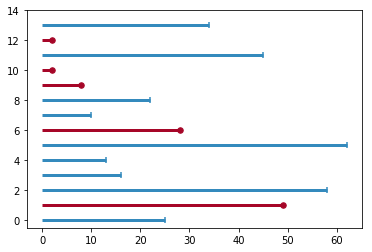

In [249]:
censored = pd.get_dummies(data15['Churn'])
censored = np.array(censored.iloc[:,1])
plot_lifetimes(observed,event_observed=censored)

For a subset of customers, we observe that some of them churn before one year of contract, while others remain in the company for more that 4 years. Blue lines refer to observations for which we observe churning while red lines refers to censored customers. 

In [250]:
churn_rate

,customerID
Churn,
No,0.73463
Yes,0.26537


Around 3/4 of the dataset is  censored. That is, we do not observe failure in the interval of study.
It is reasonable to assume that, at some point, all customers will churn.

In customer churn analysis, customers do not know they have been tracked in a study or, at least, it will not change their behaviour (Hawthorn effect). Moreover, participation in the study is at zero effort cost. Hence, probability of drop-out is also eliminated.
Due to the large amount of censored data, it will be difficult (if not impossible) to estimate the expected lifetime of a customer. However, for the reasons above, we expect the censoring to be non-informative. Thus, the estimation of coefficient will not be biased due to this effect.

In [251]:
data_groupby_churn

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,NoDumMultipleLines,No phone serviceDumMultipleLines,DSLDumInternetService,Fiber opticDumInternetService,NoDumOnlineSecurity,...,No internet serviceDumStreamingMovies,Bank transfer (automatic)DumPaymentMethod,Credit card (automatic)DumPaymentMethod,Electronic checkDumPaymentMethod,FemaleDumgender,NoDumPartner,NoDumDependents,NoDumPhoneService,NoDumPaperlessBilling,Intercept
Churn,,,,,,,,,,,,,,,,,,,,,
No,3508.431001,0.128721,37.569965,61.265124,2554.765772,0.491109,0.098956,0.379204,0.347700,0.393699,...,0.273096,0.248550,0.249324,0.250097,0.492656,0.471782,0.655199,0.098956,0.464438,1.0
Yes,3555.795078,0.254682,17.979133,74.441332,1531.796094,0.454254,0.090958,0.245586,0.693954,0.781701,...,0.060460,0.138042,0.124131,0.573034,0.502408,0.642055,0.825575,0.090958,0.250936,1.0


We observe that E(T|churn=Yes)=18 month approximately. This data is not censored so we can expect that this information is close to the real value in the population. However, we cannot infer directly E(T) because E(T|churn=No and Observed period<t)= 37.56. That is, the data is censored for people who did not churn. 

We also observe different values on the mean of several features of the customer, for example:
    
    - A high proportion of customers who churned where clients of Fiber optic service, which might indicate a poor service of this product compared to the competence.
    - Payment method of customers who churned differs substantially.
    - On average, churning customers paid a higher monthly bill.

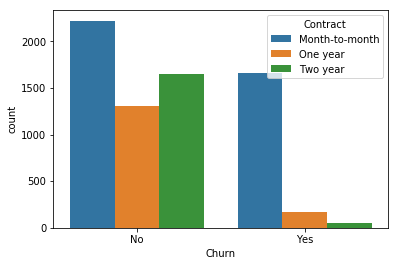

In [252]:
sns.countplot(data = data, x= data.Churn, hue =  data.Contract)

We observe, for example, that the structure of contracts for people who Churn is very different from those who do not churn. Thus, contract lenght might be a good explanatory variable for survival time prediction.

### Goodness of fit of the different distributions

A crutial aspect of parametric models is that of choosing the correct specification for the hazard function. Before modelling the data and getting indicators of performance, we can describe the different distributions and their fitness to the data.
We first take a naive approach to define a survival function from the sample and get a first idea of the data. If the data was not censored, we could infer the population survival function from the sample and get a relatively good approach for a sample large enough. Then we estimation the survival function using a non-parametric approach, the Kaplan-Meier estimator.

Text(0.5, 1.0, 'Empirical Survival function')

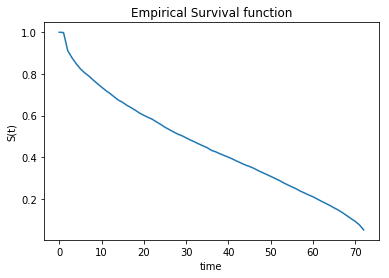

In [253]:
sns.lineplot( x="time", y= 'S(t)', data = empirical_survival_function).set_title('Empirical Survival function')

Text(0.5, 1.0, 'Kaplan Meier Survival function')

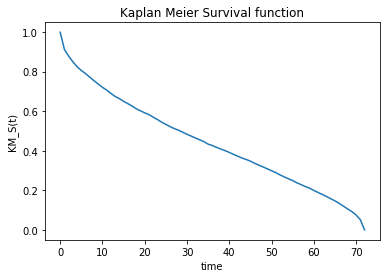

In [254]:
sns.lineplot( x="time", y= 'KM_S(t)', data = KM_survival_function).set_title('Kaplan Meier Survival function')

We observe that a huge propotion of customers churn in the first months. After that the probability of surviving decreases constantly over time until time 70 when survival probability drops suddenly.

Through different transformations of the Kaplan Meier survival function estimated, we check the goodness of fit to each of the distributions proposed graphically and by maximum likelihood estimation, using only the intercept. The parameters can be recovered by taking the exponential of the coefficient estimated. That is, for exponential distribution, to recover lambda, we need to take the exponential of the Beta estimated because the Intercept variable was also exponentiated in the corresponding likelihood function. 

In the next section we are going to graphically check the adequacy of each assumed distribution to data and estimate the different parameters for each distribution. Finally, we infer which model fits the data best according to different criterions.

**Exponential Distribution**

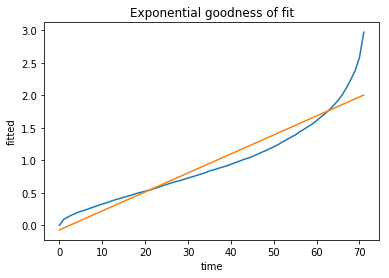

In [255]:
sns.lineplot( x="time", y= '-log(KM_S(t))',
             data = KM_survival_function).set_title('Exponential goodness of fit')
sns.lineplot( x="time", y= 'fitted',
             data = fitted_exp)

In [256]:
exponential_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -10847.
Model:                  ExponentialPH   AIC:                         2.170e+04
Method:            Maximum Likelihood   BIC:                         2.170e+04
Date:                Thu, 29 Nov 2018                                         
Time:                        20:50:50                                         
No. Observations:                7043                                         
Df Residuals:                    7042                                         
Df Model:                           0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8039      0.023   -207.682      0.000      -4.849      -4.759
==============================================================================
"""

**Weibull Distribution**

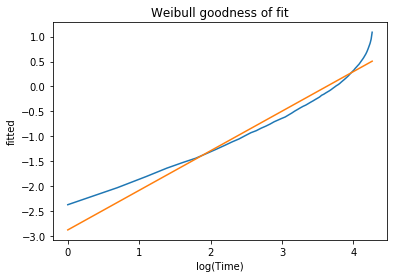

In [257]:
sns.lineplot( x="log(Time)", y= 'log(-ln(S(t)))',
             data = KM_survival_function).set_title('Weibull goodness of fit')
sns.lineplot( x="log(Time)", y= 'fitted',
             data = fitted_wei)

In [258]:
weibull_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              WeibullPH Results                               
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -10576.
Model:                      WeibullPH   AIC:                         2.115e+04
Method:            Maximum Likelihood   BIC:                         2.116e+04
Date:                Thu, 29 Nov 2018                                         
Time:                        20:50:51                                         
No. Observations:                7043                                         
Df Residuals:                    7042                                         
Df Model:                           0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4781      0.054    -64.910      0.000      -3.583      -3.373
p              0.6447      0.013     48.534      0.000       0.619       0.671
==============================================================================
"""

**Log-logistic Distribution**

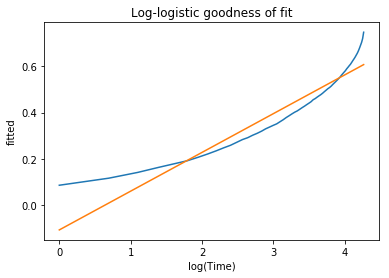

In [259]:
sns.lineplot( x="log(Time)", y= '-(ln(S(t)/(1-S(t))))',
             data = KM_survival_function).set_title('Log-logistic goodness of fit')
sns.lineplot( x="log(Time)", y= 'fitted',
             data = fitted_log)

In [260]:
loglog_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            LoglogisticPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -7308.2
Model:                  LoglogisticPH   AIC:                         1.462e+04
Method:            Maximum Likelihood   BIC:                         1.463e+04
Date:                Thu, 29 Nov 2018                                         
Time:                        20:50:52                                         
No. Observations:                7043                                         
Df Residuals:                    7042                                         
Df Model:                           0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4481      0.063    -38.962      0.000      -2.571      -2.325
theta          1.1466      0.021     53.716      0.000       1.105       1.188
==============================================================================
"""

**Gompertz Distribution**

The log of the hazard function under Gompertz distribution is linear in time: $$ log(\lambda(t)) = log(\lambda) + \theta t $$ 

We also know that the hazard function is the derivative with respect to t of the log of survival function. Thus, we will take a numerical differentiation of the log of our KM survival function and plot it against time. We should expect this plot to be linear under Gompertz distribution.

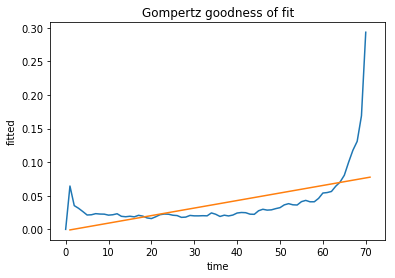

In [261]:
sns.lineplot( x="time", y= '-dlog(S(t))/dt',
             data = values_gom).set_title('Gompertz goodness of fit')
sns.lineplot( x="time", y= 'fitted',
             data = fitted_gom)

In [262]:
gompertz_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              GompertzPH Results                              
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -10676.
Model:                     GompertzPH   AIC:                         2.135e+04
Method:            Maximum Likelihood   BIC:                         2.136e+04
Date:                Thu, 29 Nov 2018                                         
Time:                        20:50:54                                         
No. Observations:                7043                                         
Df Residuals:                    7042                                         
Df Model:                           0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2447      0.036   -119.511      0.000      -4.314      -4.175
theta         -0.0260      0.001    -17.335      0.000      -0.029      -0.023
==============================================================================
"""

In [263]:
Table_AIC_sur_intercept_all

,Distribution,AIC_sur
0,Exponential,21702.975030
1,Weibull,21162.576600
2,Log-logistic,14626.500259
3,Gompertz,21361.082267


According to AIC_sur, AIC and BIC criterion, Log-logistic is the underlying distribution that best fits our data. Moreover, we observe that the valeu 'p' for the Weibull distribution is significantly different from 1. In addition, AIC_sur, AIC and BIC is lower in Weibull estimations than Exponential distribution. Hence, Weibull distribution fits the data better than Exponential. With respect to Gompertz distribution, we observe that Theta value is significantly different from zero. Thus, Gompertz distribution is significantly different from exponential distribution and, according to the data, fits better in AIC_sur, AIC and BIC criterion.

### Proportional Hazards assumption

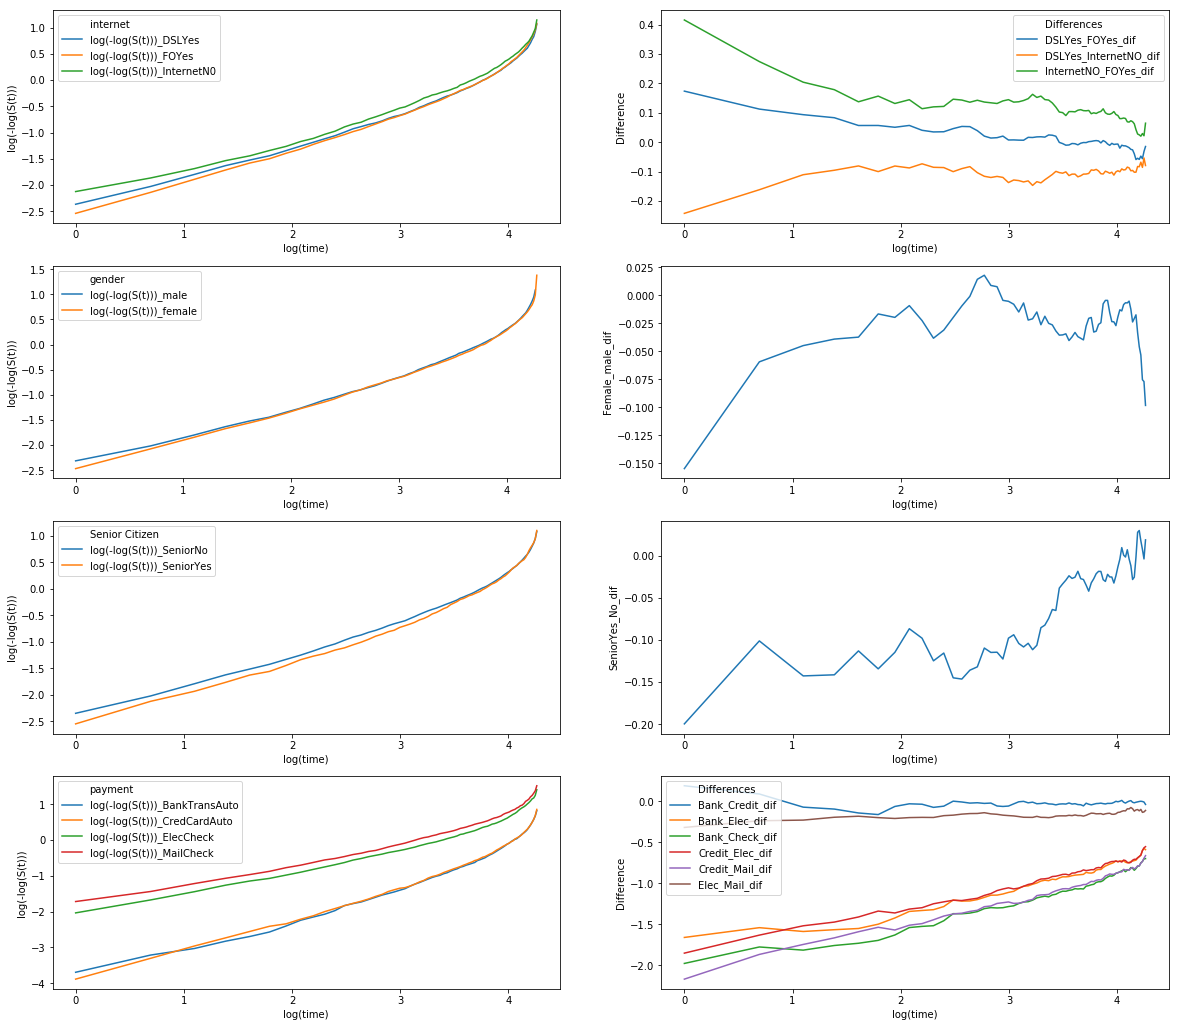

In [264]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches(20, 18)
sns.lineplot(x="log(time)", y="log(-log(S(t)))", hue='internet', data=KM_survival_function_internet_melt,ax=ax[0][0])
sns.lineplot(x="log(time)", y="log(-log(S(t)))", hue='gender', data=KM_survival_function_gender_melt,ax=ax[1][0])
sns.lineplot(x="log(time)", y="log(-log(S(t)))", hue='payment', data=KM_survival_function_payment_melt, ax=ax[3][0])
sns.lineplot(x="log(time)", y="log(-log(S(t)))", hue='Senior Citizen', data=KM_survival_function_senior_melt, ax=ax[2][0])
sns.lineplot(x="log(time)", y='SeniorYes_No_dif', data=KM_survival_function_senior, ax=ax[2][1])
sns.lineplot(x="log(time)", y="Female_male_dif", data=KM_survival_function_gender,ax=ax[1][1])
sns.lineplot(x="log(time)", y="Difference",hue='Differences', data=KM_survival_function_internet_dif,ax=ax[0][1])
sns.lineplot(x="log(time)", y="Difference",hue='Differences', data=KM_survival_function_payment_dif,ax=ax[3][1])

In this section we analyse graphically the correctness of assuming proportional hazards on the covariates. By taking logarithms of time and the negative logarithm of the survival function, we should expect parallel shifts on the curve as we change the value of a category. Left-hand side graphs show these parallel shifts while right-hand side graphs shows the differences between two curves of the left-hand side graphs. Graphs on the right helps to better observe correctness of Proportional Hazards assumption: we should expect straight horizontal lines if the assumption holds.

**Graph 1**(Internet service): the assumption partially holds althought the differences are smaller as time increases.

**Graph 2**(Gender): the assumption does not hold. Actually, we do not observe big differences on the survival function by gender.

**Graph 3**(Senior Citizen): the assumption does not hold. Althought tiny differences, it seems that senior citizens has more probability to survive as the curve is in a lower level (remember we are taking negative log of the survival function).

**Graph 4**(Type of payment): we observe big differences on the survival function between different types of payment. Proportional hazards assumption seems to perfectly hold on Electronic and Mail payment and Bank and Credit payment. However, the lines are not constant for the rest of the differences.

In conclusion, proportional hazards assumption holds for some of the variables while it appears to be a time effect for others. Thus, we will introduce interaction terms with time at the end of our variable selection process.

### Variable selection 

In this section, we perform a variable selection process similar to the one proposed by Panzarella,Tony. MODEL SELECTION STRATEGIES which was first described by Collet. We fully describe the procedure in the Theory section. Given the nature of the variables: dummies obtained from categorical data; other variable selection process could be applied (Grouped Lasso, for example). Grouped Lasso is an extension of the classical Lasso regularization technique. It generates sparcity, as the original method. However, it forces sparcity for all dummies corresponding to the same original categorical variable. A possible extension of the present work would be to compare both methodologies (the one presented below and Grouped Lasso) in survival analysis cases.

#### Non-invertable Hessian Matrix

One of the problems we encountered when estimating the model with all the available predictors was that the Hessian Matrix was not invertable. Thus, standard errors could not be estimated and the convergence was not reliable. We first tried to overcome the solution by analysing the variance covariance matrix of the predictors. We observed that there was a large amount of dummy variables and few with a larger domain, creating high variances between predictors.

Hence, the first solution proposed was to normalize all the variables in a 0/1 range. However, Hessian was still not invertable.

We reanalize the variance covariance matrix for the normalized predictors looking for two potential that could cause Hessian matri to be non-invertable: multicollinearity and misstructure. We set the threshold for covariance between variables at 0.7, as suggested by in ResearchGate: How to deal with high correlation among predictors in multiple regressions. We did not find any strong correlation between predictors. If so, we would have selected one of those (the one giving best prediction, in terms of maximazing log-likelihoog and significance). Moreover, we also checked that all correlations between variables were between -1 and 1 and the variance was, at most, 1 (Misstructure). The problem was not yet solved.

Later, we perform an estimation of each variable separately to select those variables that predict the data better. We eliminate all variables not significant at a 90% confidence interval. However, we encountered Hessian inversion problems.

Finally, we analyzed the variance of each variable. Most of the variables in the dataset are dummies generated from categorical variables. Consequently, there is a huge amount of zeros and just a few non-zero observations. Potentially, Hessian inversion problems might occur due to this low variance. We decide to take variables with higher variance, setiing the threshold at 0.2.

After performing this selection, we were able to estimate the model with all the covariates and we proceeded to apply Collet approach on variable selection.

At every of this steps, we also checked the eigen values of the variance_covariance matrix. There were some negative or zero values showing that the matrix was not Positive Definite and, hence, not invertable directly.

There are several less naive approaches to overcome the problem of non-inveratble Hessian matrix. However, it was out of the scope of this project to analyse deeply these measures. Here we propose some of the ideas we could have further explored:

 - Gill,Jeff and King,Gary (2004). What to Do When Your Hessian Is Not Invertible: Alternatives to Model Respecification in Nonlinear Estimation.

#### Collet approach to variable selection on Survival Analysis

Given the pre-selected variables, we perform a variable selection following the guides from Collet(1994). The objective of this section is to show how variable selection process should be performed. Hence, we took a subset of the data and the exponential estimation as the computational time was smaller.
 - The first step, forward selection, was already performed as all the pre-selected variables were significant on its own at a 90% confidence level
 - Secondly, we perform a backward selection process. From the whole model, we estimate different models taking out one of the exogenous variables at each time. We select the model who perform better based on log-likelihood because the number of observations and covariates in each model is the same (elimination of the least explanatory variable). We keep performing this process until we find all variables are significant (confidence level was set at 95%).
 - Third step would be to do a forward selection process based on outcome from step 2 and including non-significant variables from step 1. However, we skip this process as all variables were significant in step 1. 
 - Finally, as suggested by Collet, we introduce potential interaction terms. In the analysis of the goodness of fit we encountered that most distributions deviated largely in the last periods of time. Thus, we introduce interaction terms of time with the different covariates to capture the different effect of the variable in the early stages compared to the last stages. The introduction of this interactions terms in the model was done by forward selection.
 
The following graphs shows the evolution of AIC criterion for the best model at each step:

Text(0.5, 1.0, 'Improvement of AIC value after each step on variable selection')

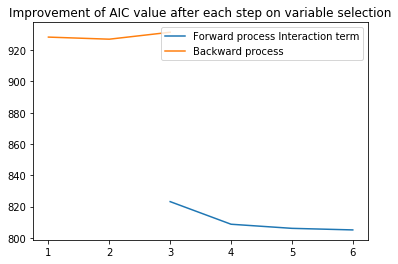

In [265]:
plt.plot(range(3,7),forward_AIC_improvement)
plt.plot(range(1,4),backward_AIC_improvement)
plt.legend(['Forward process Interaction term', 'Backward process'], loc='upper right')
plt.title('Improvement of AIC value after each step on variable selection')

We observe that AIC value decreases as we apply varibale selection. The biggest jump is between the application of backward and forward method, when we introduce interactions terms. Furthermore, we are able to fine tune our model in the last forward steps. This improvement is lower at each iteration.

The results of the best model fitted are:

In [266]:
results_best_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            ExponentialPH Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -387.51
Model:                  ExponentialPH   AIC:                             805.0
Method:            Maximum Likelihood   BIC:                             863.0
Date:                Thu, 29 Nov 2018                                         
Time:                        20:49:46                                         
No. Observations:                 352                                         
Df Residuals:                     337                                         
Df Model:                          14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0310      0.224     -0.138      0.890      -0.470       0.408
x2             1.3710      0.821      1.670      0.095      -0.238       2.980
x3             1.4548      0.798      1.822      0.068      -0.110       3.020
x4             0.4813      0.329      1.465      0.143      -0.163       1.125
x5             1.2164      0.456      2.668      0.008       0.323       2.110
x6             0.0323      0.269      0.120      0.904      -0.494       0.559
x7             0.0972      0.297      0.327      0.744      -0.485       0.680
x8            -0.2519      0.240     -1.050      0.294      -0.722       0.218
x9             0.2444      0.252      0.971      0.332      -0.249       0.738
x10            1.5466      0.481      3.216      0.001       0.604       2.489
const         -5.7070      0.417    -13.699      0.000      -6.524      -4.891
x11           -0.0436      0.013     -3.310      0.001      -0.069      -0.018
x12           -0.0488      0.016     -2.988      0.003      -0.081      -0.017
x13           -0.0504      0.021     -2.416      0.016      -0.091      -0.010
x14           -0.0219      0.013     -1.707      0.088      -0.047       0.003
==============================================================================
"""

The following list shows a relation of variables and its name:

In [287]:
for i,d in best_model_variables_dic.items():
    print (i, d)

x1 NoDumMultipleLines
x2 DSLDumInternetService
x3 Fiber opticDumInternetService
x4 NoDumOnlineSecurity
x5 NoDumOnlineBackup
x6 NoDumDeviceProtection
x7 NoDumTechSupport
x8 NoDumStreamingTV
x9 Electronic checkDumPaymentMethod
x10 NoDumDependents
const Intercept
x11 NoDumDependentsInteraction
x12 NoDumOnlineBackupInteraction
x13 DSLDumInternetServiceInteraction
x14 Fiber opticDumInternetServiceInteraction


We observe, for example, that the variable NoDumOnlineBackup has an statistical significant positive value. The exponential of the beta = 1.2164 is 3.375, approximately. It means that a person who does not do online backups has 3.375 times more probability to churn at each period compared to someone who does it, all else equal (assuming proportional hazards). If we assume Accelerate Failure Time, the interpretation would be that the probability of churning faced by somebody who does not do a backup online at time t = 1 is the same as the probability of churn of somebody who does a backup online at time t = 3.375.

As a general observation (without considering significance of coefficient), we observe that people having either DSL or Fiber Internet service have more probability to churn compared to those not having internet service. However, as they remain in the company, this probability is reduced (according to the interaction terms for DSl and Fiber optic). A possible explanation is that the primary service given by the company is poor. Consequently, customers are not happy when contract this service. However, if this primary service (time of installation, etc.) is good, people remain in the company. 
Nevertheless, we would need to further explore these hypothesis to infer causality. The above explanation serves as a general framework of how results should be interpreted.

### Simulation study on the performance of AIC_sur on small samples

On this section we analyse the performance of AIC criterion agains improved AIC criterion described in the Theory section.
Hua Liang and Guohua Zou argued in his paper Improved AIC Selection Strategy for Survival Analysis.Comput Stat Data Anal. 2008 Jan 20; 52(5): 2538–2548 that the proposed criterion performs better in small samples and relatively equal for large enough samples compared to traditional AIC approach.
To test this hypothesis, we have designed a small simulation study consisting on predict correctness of model thorugh these two criterions.
We take two rounds of small (n=15, approx.) and larger samples (n=70, approx). For each round 50 random draws from the whole subset are taken. On the next step, we estimate three different models:
- Model 1: consisting in two variables, Intercept and Best predictor obtained from the first step in Collet Variable Selection ('NoDumOnlineSecurity').
- Model 2: consisting in two variables, Intercept and random variable assign a value obtained from a uniform 0/1 distribution to each observation. Uniform distribution was selected to ensure that we observed same proportions for all values and higher variance (more probable to find spurious correlation).
- Model 3: consisting in three variables, Intercept, Best predictor and random variable.

Opposed to the simulation performed by Hua Liang and Guohua Zou, we use real data to do the simulation.
By construction, the best model is model 1. We compare what are the solutions given by each criterion in small and larger samples (results might differ slightly on each running of the code because different random samples are taken). The small sample takes 0.002% of the whole dataset while the large sample takes 0.008%. The following tables shows proportion of model choosen.

In [268]:
comparison_002 #small sample

,Criterion,Model 1,Model 2,Model 3
0,AIC,0.10,0.32,0.58
1,AIC Improved,0.68,0.28,0.04


In [269]:
comparison_008 #larger sample

,Criterion,Model 1,Model 2,Model 3
0,AIC,0.68,0.26,0.06
1,AIC Improved,0.78,0.04,0.18


Regarding the first table (small sample), we observe that AIC improved performs much better than AIC because it chooses Model 1 more frequently. We also observe that AIC tends to choose Model 3 in small samples. A potential explanation is that AIC does not penalize enough for spurious correlation generated by the random variable. Surprisingly (might be caused by chance), AIC tends to choose model 2 rather than model 1.

On the other hand, as number of observations increase, both criterions derives similar results, choosing model 1 as the preferred model. However, we find that AIC penalizes more for increasing the number of covariates. Hence, it tends to choose model 2 rather than model 3.

## References

[1] Hua Liang, Guohua Zou. Improved AIC Selection Strategy for Survival Analysis.Comput Stat Data Anal. 2008 Jan 20; 52(5): 2538–2548.

[2] German Rodrıguez.Parametric Survival Models. 2001 Spring

[3] Jiezhi Qi. Comparison of Proportional Hazards and Accelerated Failure Time Models. 2009 Mar

[4] StatsModel. 2018. StatsModel. [ONLINE] Available at: https://www.statsmodels.org/dev/_modules/statsmodels/base/model.html#GenericLikelihoodModel.fit. [Accessed 30 November 2018].

[5] Mustafa Oguz. 2018. GitHub. [ONLINE] Available at: https://github.com/MustafaOguz/Survival_Analysis/blob/master/4_Parametric_Models.ipynb. [Accessed 30 November 2018].

[6]Ingrid Van Keilegom. Survival Analysis. 2015 Sept

[7]Yi Li.Model Selection in Survival Analysis (Lecture 6)


In [270]:
#####################END###########################################